
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

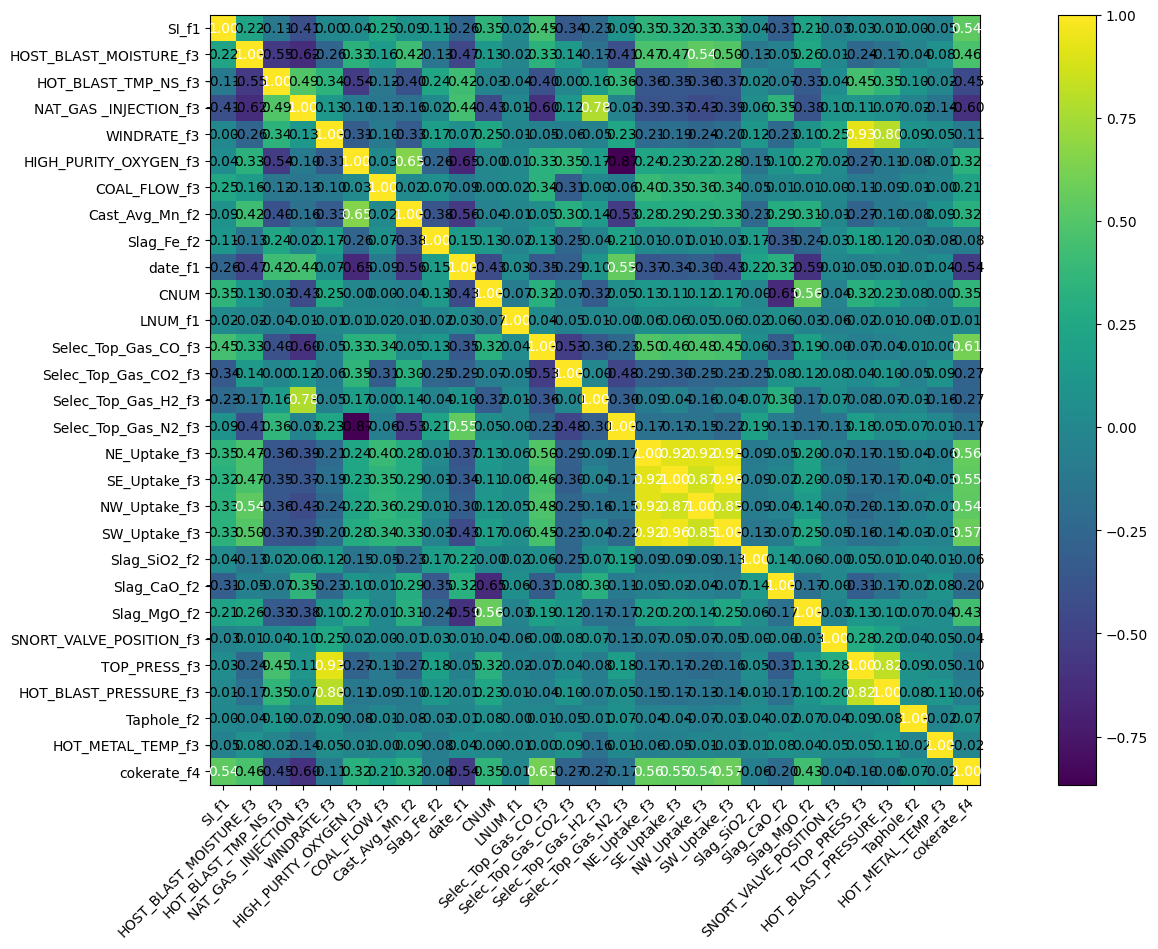

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Pass Wrangled data to GPT experimenter


In [14]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [15]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)

    sdtw_criterion = SoftDTW(use_cuda=True, gamma=0.1)

 
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        ## loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )

        ############################################
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        #######################################################
        
        ## Curve_SIMs = tsGPT_obj.MySoftmax(  Curve_SIMs[ [ 0, 3] ]  )
        ## loss = (0.00001)*loss_SI + Curve_SIMs[3]               

        #######################################################
        # Just like any torch.nn.xyzLoss()
        ## print( loss_change_pred.reshape(B, (T-1), E )[:,:, 2:3 ].shape )
        loss_DTW = sdtw_criterion(loss_change_pred.reshape(B,(T-1), E )[:,:, 2:3], loss_change_real.reshape(B, (T-1),E )[:, :, 2:3] )  
        
        loss = loss_DTW 
        
       
        #######################################################
        optimizer.zero_grad( set_to_none=True )    
        loss = loss.mean()  ## Aggregate and call backward() # sdtw_criterion only
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( 0 ) # loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        #history['loss_SIM2'].append( Curve_SIMs[2] )
        #history['loss_SIM3'].append( Curve_SIMs[3] )
        #history['loss_SIM4'].append( Curve_SIMs[4] )
        #history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
            print(Curve_SIMs)
            print( [ loss_SI , loss_all ] )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [16]:

'''

batch_size, len_x, len_y, dims = 8, 15, 12, 5
x = torch.rand((batch_size, len_x, dims), requires_grad=True)
y = torch.rand((batch_size, len_y, dims))
x.shape
x[1, 1, :5]

'''


'\n\nbatch_size, len_x, len_y, dims = 8, 15, 12, 5\nx = torch.rand((batch_size, len_x, dims), requires_grad=True)\ny = torch.rand((batch_size, len_y, dims))\nx.shape\nx[1, 1, :5]\n\n'

In [17]:

## x[1, 1, 2:3]


In [18]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  24.242755889892578
seq length of pred =  30
[ 5.29591406  2.61602151 15.87074477 29.46506329  0.92839063  0.53129492]
[tensor(1.8568, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3638, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  26.176891326904297
seq length of pred =  30
[ 5.28612171  2.62170379 16.34226066 30.22949812  0.97257551  0.54050359]
[tensor(1.9452, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4023, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  29.07636260986328
seq length of pred =  30
[ 5.74580377  3.01757007 17.72238239 31.55180446  1.09066154  0.5649198 ]
[tensor(2.1813, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5370, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  24.507553100585938
seq length of pred =  30
[ 5.11695046  2.67305989 16.83081993 30.09395667  0.99265516  0.5419041 ]
[tensor(1.9853, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4256, device='cud

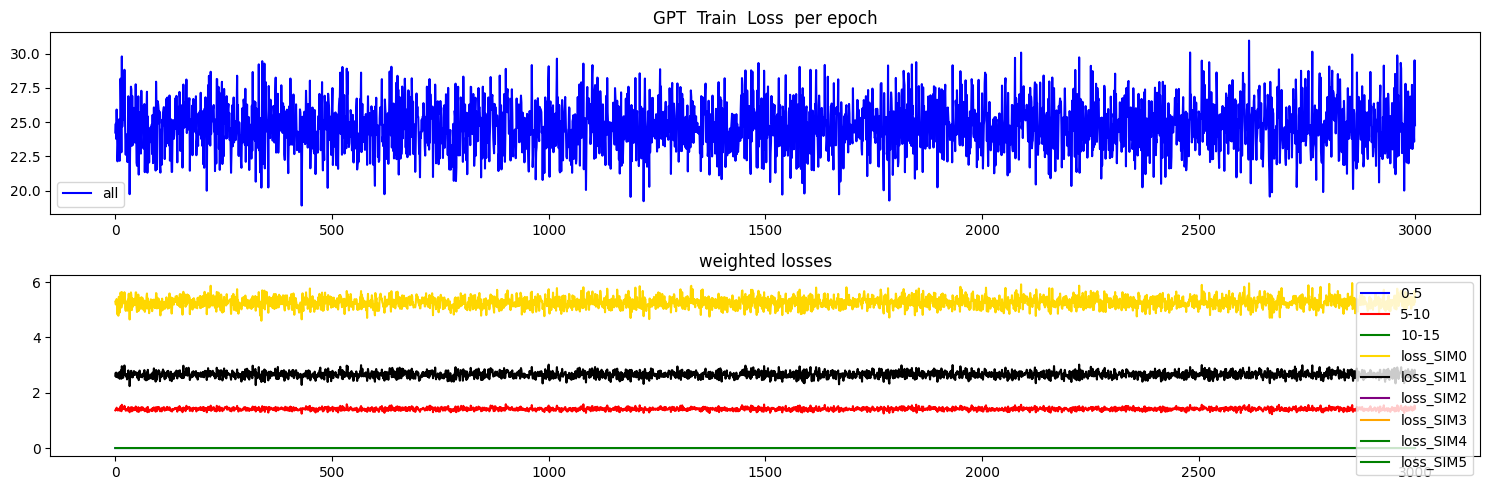

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.0816820040345192
Test MSE Loss - SI only 0-5:  0.2326287031173706
Test MSE Loss - SI only 5-10:  0.16141721606254578
Test MSE Loss - SI only 10-15:  0.027061384171247482
mae, mse, rmse, mape, mspe, rse, corr
(0.2129311, 0.08168201, 0.28580064, 15.294399, 5414.2476, 1.4640346)
Testing R**2 - SI only:  -1.1433968771935419
Testing R**2 - SI only:  -1.1433968771935419
Testing R**2 - All features:  0.9878972478219503
Testing R**2 - (f2) - SI full:  -0.24308518776918686


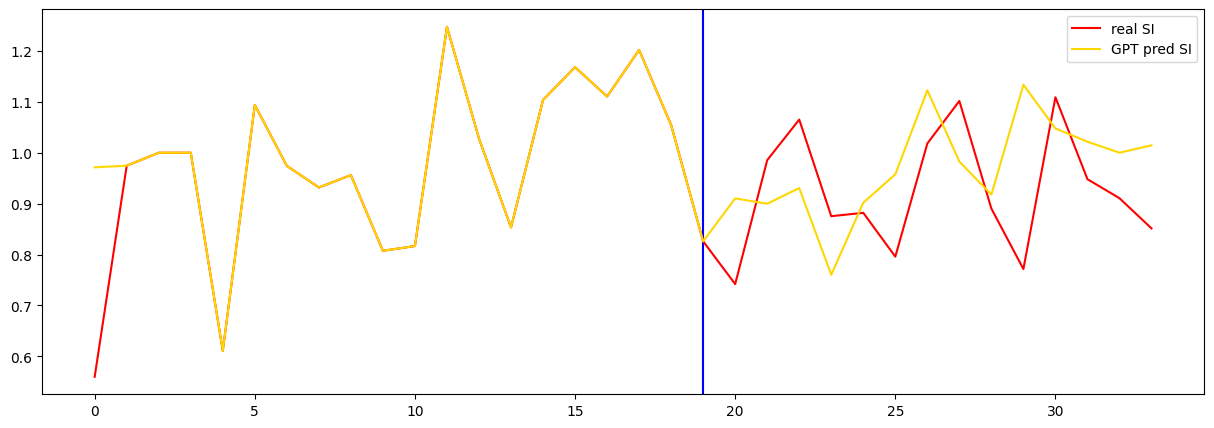

In [19]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  24.036046981811523
seq length of pred =  30
[ 8.97080611  2.51462557 14.61763084 26.15574309  0.69215708  0.45314383]
[tensor(1.3843, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3197, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  24.023334503173828
seq length of pred =  30
[ 8.69505062  2.6991369  14.5290055  26.80861902  0.70912561  0.46467034]
[tensor(1.4183, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3471, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  19.917545318603516
seq length of pred =  30
[ 8.29667997  2.39469398 12.99211899 24.48232242  0.59711355  0.42485258]
[tensor(1.1942, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2274, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  22.089155197143555
seq length of pred =  30
[ 9.21059774  2.43828046 13.81708541 25.34410756  0.6377326   0.43880782]
[tensor(1.2755, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3224, device='cu

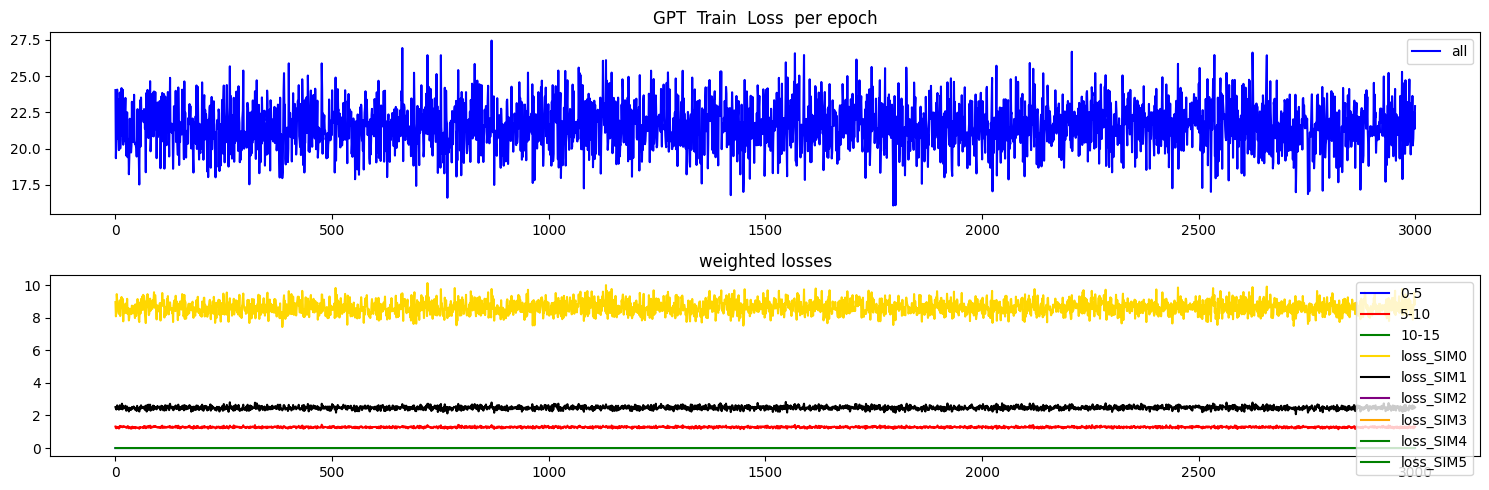

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.09353597462177277
Test MSE Loss - SI only 0-5:  0.2326287031173706
Test MSE Loss - SI only 5-10:  0.16141721606254578
Test MSE Loss - SI only 10-15:  0.027061384171247482
mae, mse, rmse, mape, mspe, rse, corr
(0.22623637, 0.093535975, 0.30583653, 15.724129, 5427.8984, 1.5666697)
Testing R**2 - SI only:  -1.4544540203369096
Testing R**2 - SI only:  -1.4544540203369096
Testing R**2 - All features:  0.9894932974394721
Testing R**2 - (f2) - SI full:  -0.23699711198529516


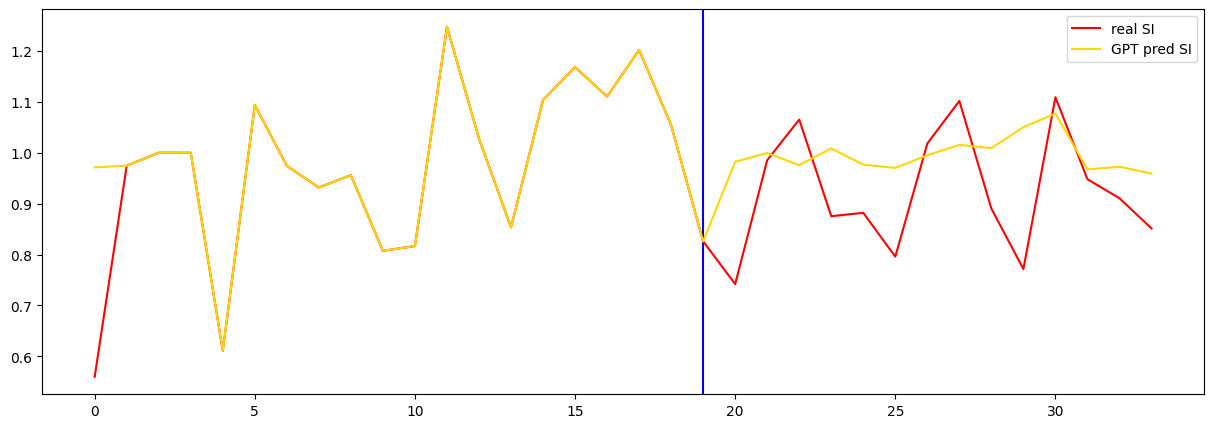

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  15.436473846435547
seq length of pred =  30
[ 4.92395505  2.38818968 13.90317479 23.73609973  0.61475797  0.41464996]
[tensor(1.2295, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1922, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  13.999902725219727
seq length of pred =  30
[ 4.59653714  2.23843411 13.39010102 23.77858769  0.56935332  0.41453557]
[tensor(1.1387, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1812, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  17.658016204833984
seq length of pred =  30
[ 4.84940476  2.63230171 13.58034112 23.6952477   0.61922661  0.41192464]
[tensor(1.2385, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2394, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  18.66109848022461
seq length of pred =  30
[ 4.69126373  2.78284695 13.87484772 24.74605156  0.6857664   0.43053168]
[tensor(1.3715, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2501, device='cud

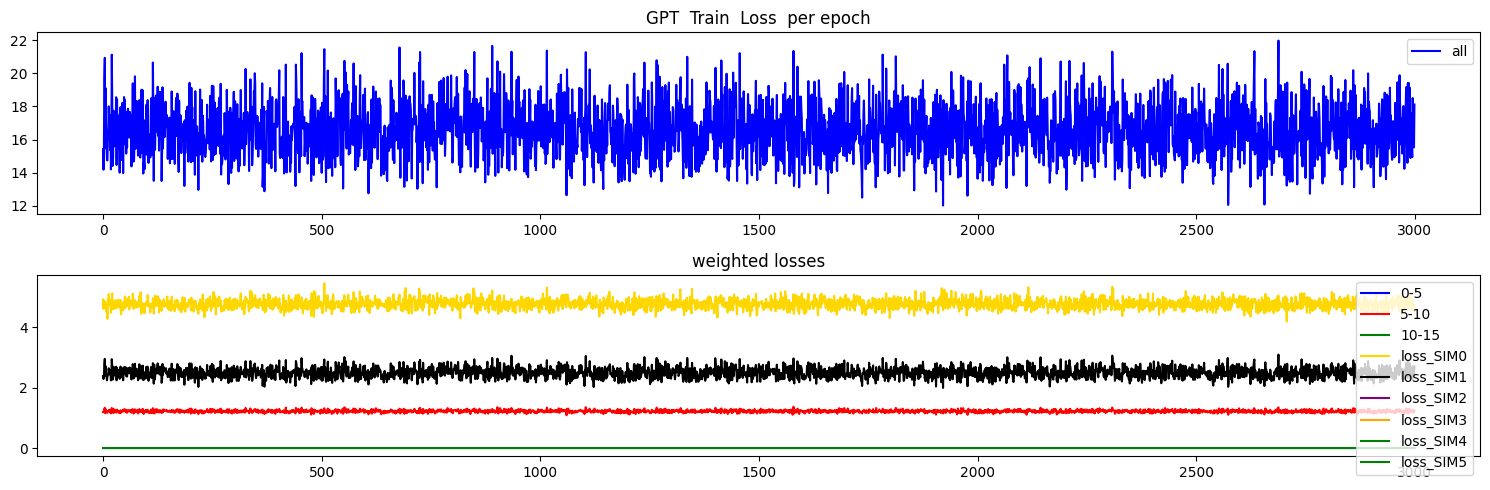

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.08456407487392426
Test MSE Loss - SI only 0-5:  0.2326287031173706
Test MSE Loss - SI only 5-10:  0.16141723096370697
Test MSE Loss - SI only 10-15:  0.027061384171247482
mae, mse, rmse, mape, mspe, rse, corr
(0.21097863, 0.084564075, 0.29079902, 15.694596, 5433.724, 1.4896392)
Testing R**2 - SI only:  -1.2190246120384463
Testing R**2 - SI only:  -1.2190246120384463
Testing R**2 - All features:  0.9844152182485608
Testing R**2 - (f2) - SI full:  -1.7138378624585737


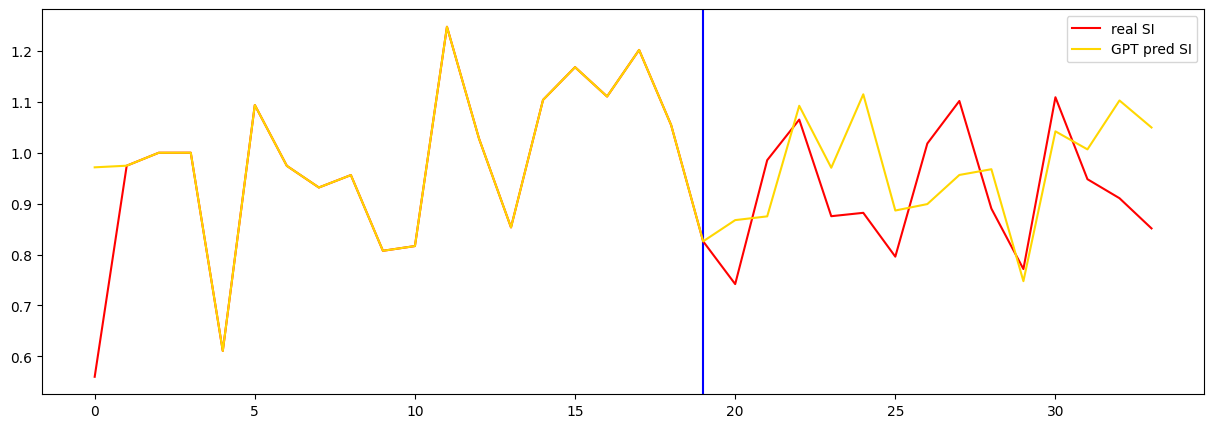

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  14.020687103271484
seq length of pred =  30
[ 4.07328446  2.22959548 13.72760179 24.85580568  0.661701    0.43890836]
[tensor(1.3234, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2079, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  18.25516128540039
seq length of pred =  30
[ 4.49965563  2.55333754 15.06021625 26.10857116  0.76640495  0.46368346]
[tensor(1.5328, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2712, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  16.365407943725586
seq length of pred =  30
[ 4.07151295  2.44457443 14.36760172 25.90207638  0.72671822  0.46045395]
[tensor(1.4534, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2720, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  17.84752655029297
seq length of pred =  30
[ 4.23642711  2.59788078 15.85811091 26.85434414  0.80774048  0.47766261]
[tensor(1.6155, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2941, device='cuda

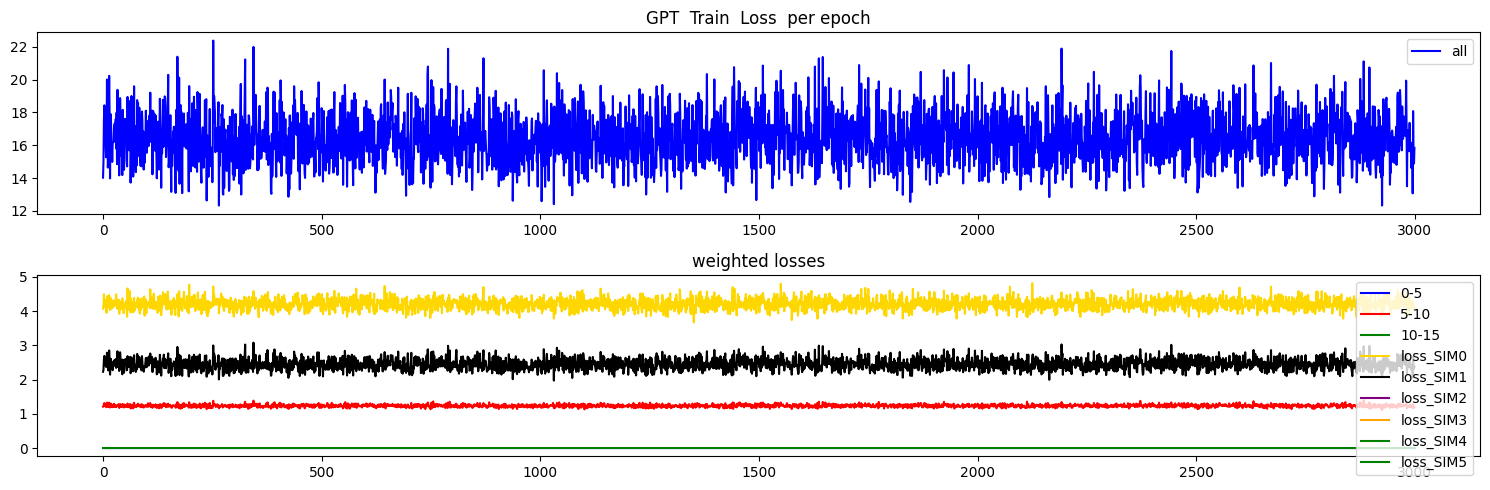

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.08799731731414795
Test MSE Loss - SI only 0-5:  0.2326287031173706
Test MSE Loss - SI only 5-10:  0.16141721606254578
Test MSE Loss - SI only 10-15:  0.027061384171247482
mae, mse, rmse, mape, mspe, rse, corr
(0.2291517, 0.08799731, 0.2966434, 15.428284, 5414.453, 1.5195774)
Testing R**2 - SI only:  -1.30911545029161
Testing R**2 - SI only:  -1.30911545029161
Testing R**2 - All features:  0.9887126244827719
Testing R**2 - (f2) - SI full:  -0.6752879052325451


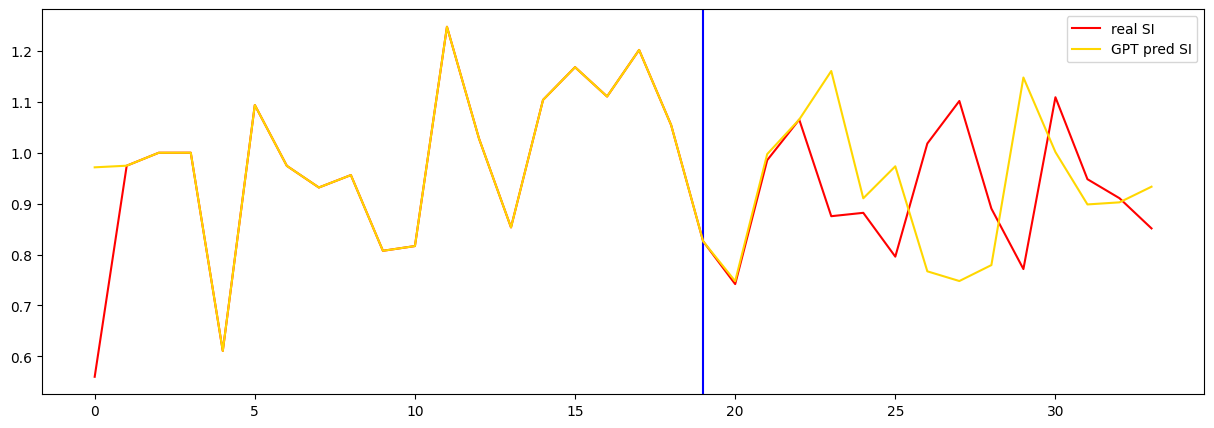

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 2


In [23]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  15.017984390258789
seq length of pred =  30
[ 4.60242309  2.27402057 13.3413446  24.09991168  0.61723927  0.42263979]
[tensor(1.2345, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1156, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.917292594909668
seq length of pred =  30
[ 5.09041587  2.3463745  13.70483676 23.88133328  0.62046514  0.41734426]
[tensor(1.2409, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1389, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  17.490360260009766
seq length of pred =  30
[ 5.27777861  2.59725019 13.77203149 24.65220388  0.66670154  0.43024268]
[tensor(1.3334, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1340, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  14.47364616394043
seq length of pred =  30
[ 4.81273558  2.28871016 12.92993606 23.39200382  0.58188254  0.40718816]
[tensor(1.1638, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0979, device='cud

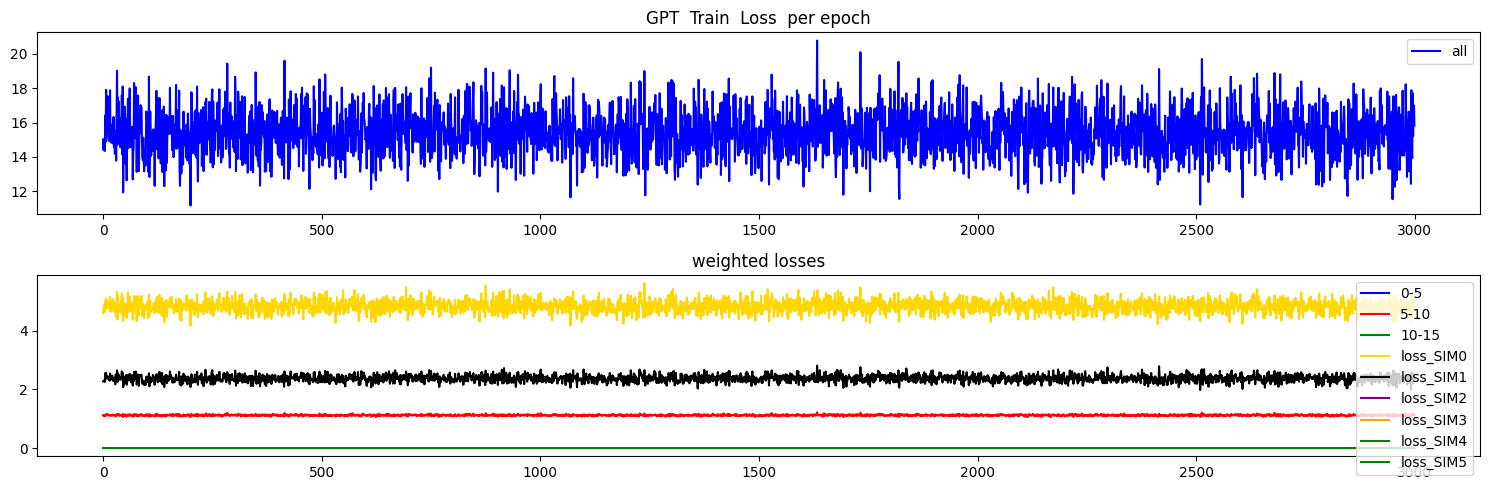

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.047360487282276154
Test MSE Loss - SI only 0-5:  0.00651113037019968
Test MSE Loss - SI only 5-10:  0.0659150704741478
Test MSE Loss - SI only 10-15:  0.03338920325040817
mae, mse, rmse, mape, mspe, rse, corr
(0.17127852, 0.04736048, 0.21762463, 1.696516, 4.554146, 1.3618455)
Testing R**2 - SI only:  -0.8546229674736756
Testing R**2 - SI only:  -0.8546229674736756
Testing R**2 - All features:  0.9875167254309218
Testing R**2 - (f2) - SI full:  -0.38371309243210394


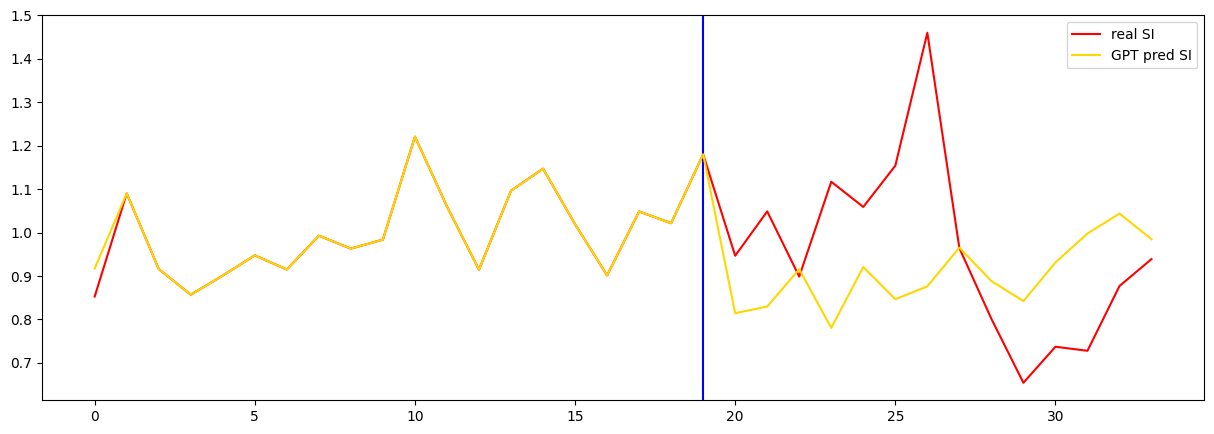

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  13.053587913513184
seq length of pred =  30
[ 4.59924099  2.35831907 12.61732731 22.601142    0.55471426  0.39413065]
[tensor(1.1094, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2103, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  11.618446350097656
seq length of pred =  30
[ 4.50040745  2.18967577 12.50846512 22.01392321  0.5265476   0.38718788]
[tensor(1.0531, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2867, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  12.185447692871094
seq length of pred =  30
[ 4.38865834  2.19116968 12.51031267 22.25176249  0.54039864  0.39195954]
[tensor(1.0808, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2501, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  11.492513656616211
seq length of pred =  30
[ 4.46190622  2.18996606 12.6805497  22.00432701  0.53186418  0.38738155]
[tensor(1.0637, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2668, device='cu

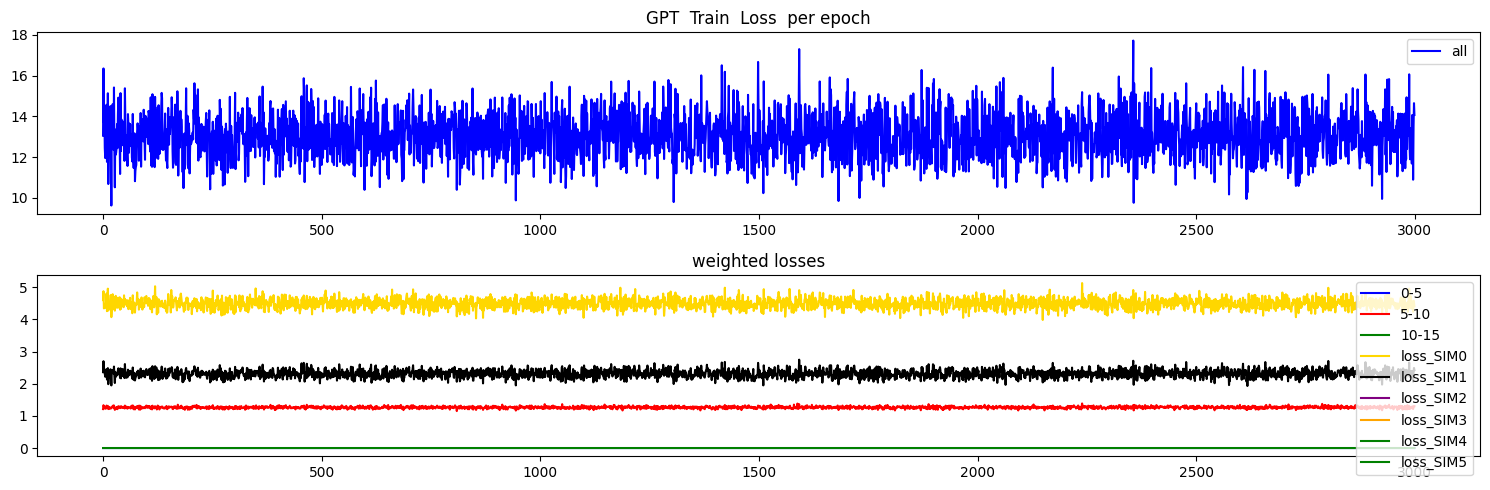

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.037316497415304184
Test MSE Loss - SI only 0-5:  0.006511129438877106
Test MSE Loss - SI only 5-10:  0.0659150704741478
Test MSE Loss - SI only 10-15:  0.03338920325040817
mae, mse, rmse, mape, mspe, rse, corr
(0.15305372, 0.037316497, 0.19317478, 1.5002551, 3.7849064, 1.2088438)
Testing R**2 - SI only:  -0.4613036392961598
Testing R**2 - SI only:  -0.4613036392961598
Testing R**2 - All features:  0.9849275674790992
Testing R**2 - (f2) - SI full:  -0.19309204999142282


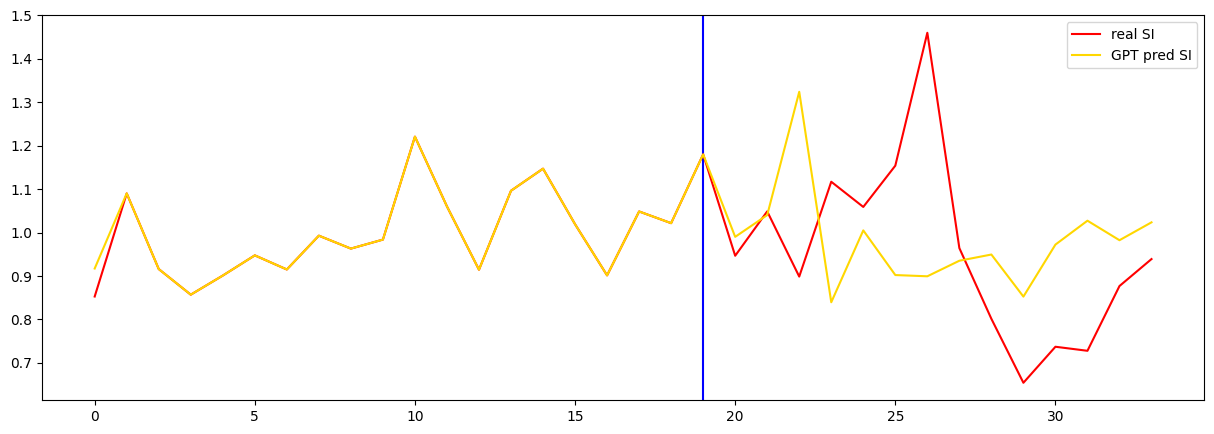

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  17.2944278717041
seq length of pred =  30
[ 3.80119     2.34552839 14.52212386 27.26973246  0.78273441  0.48593852]
[tensor(1.5655, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2878, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  17.37765884399414
seq length of pred =  30
[ 3.60935363  2.50358505 14.77363755 27.52564377  0.81388811  0.49314764]
[tensor(1.6278, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2812, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  16.876371383666992
seq length of pred =  30
[ 3.58409289  2.26009392 13.91959685 26.00435929  0.72402271  0.46482342]
[tensor(1.4480, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2553, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  16.69120979309082
seq length of pred =  30
[ 3.70217933  2.41713657 14.60705873 26.55304842  0.74837306  0.46919668]
[tensor(1.4967, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2626, device='cuda:0

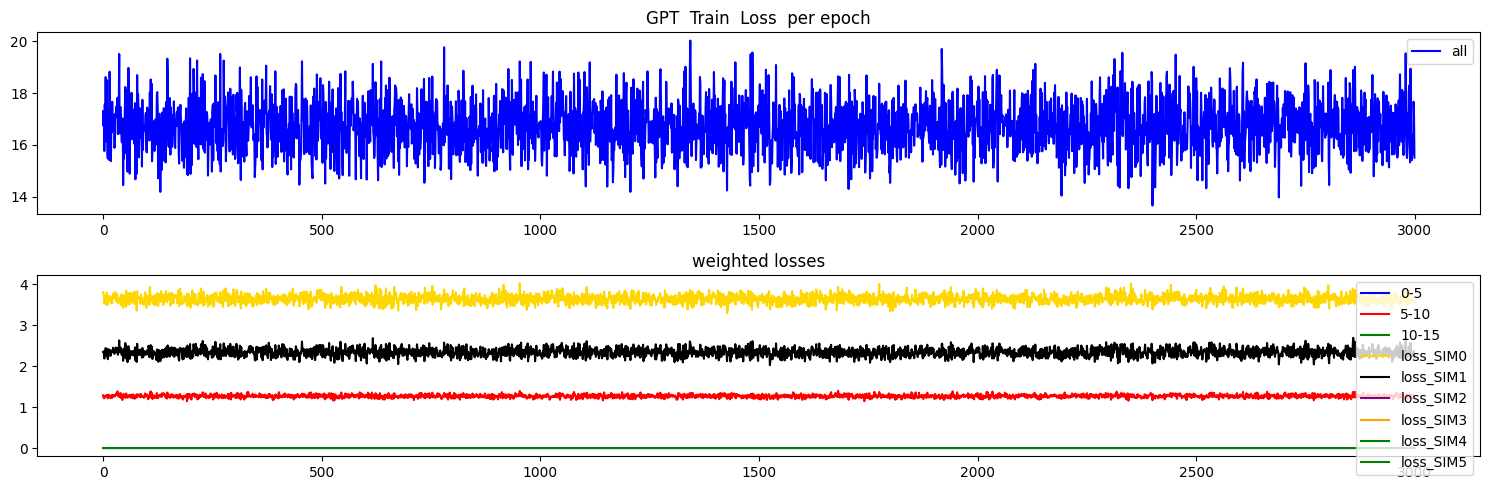

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.04052073508501053
Test MSE Loss - SI only 0-5:  0.00651113037019968
Test MSE Loss - SI only 5-10:  0.0659150704741478
Test MSE Loss - SI only 10-15:  0.033389199525117874
mae, mse, rmse, mape, mspe, rse, corr
(0.1528283, 0.04052073, 0.20129763, 1.5276419, 3.9009175, 1.2596747)
Testing R**2 - SI only:  -0.5867806151241299
Testing R**2 - SI only:  -0.5867806151241299
Testing R**2 - All features:  0.9725114027777945
Testing R**2 - (f2) - SI full:  -0.3252524452849126


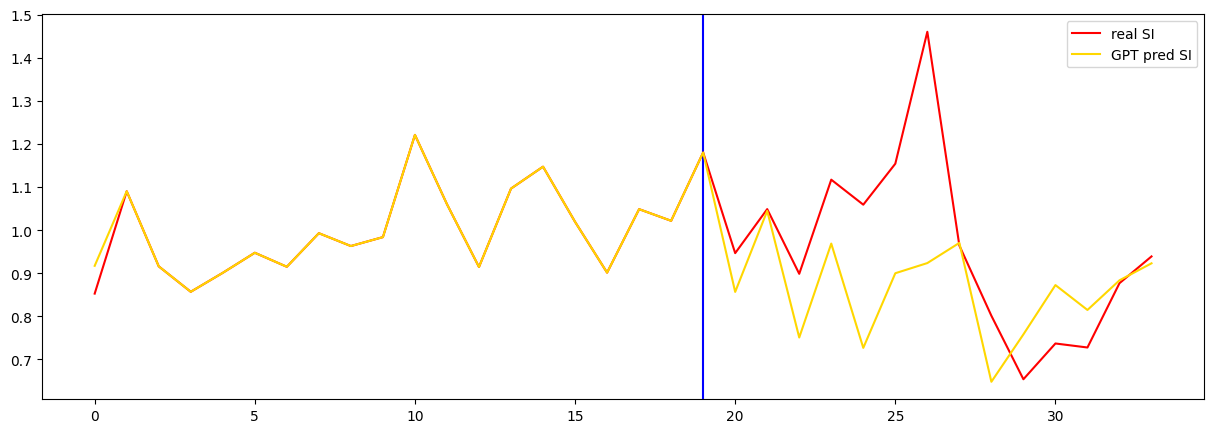

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  15.69821834564209
seq length of pred =  30
[ 4.71414196  2.35064184 13.5027969  23.96669649  0.6153291   0.41941503]
[tensor(1.2307, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2750, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  13.80057144165039
seq length of pred =  30
[ 4.59675317  2.29308846 12.82361278 22.66690201  0.57261235  0.39843831]
[tensor(1.1452, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1893, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  10.93824577331543
seq length of pred =  30
[ 4.31418026  2.02188747 13.01695567 22.33797126  0.50691561  0.38977764]
[tensor(1.0138, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1284, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  14.409595489501953
seq length of pred =  30
[ 4.49021492  2.36140389 13.38710768 22.84536711  0.57158692  0.39940137]
[tensor(1.1432, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2142, device='cuda:

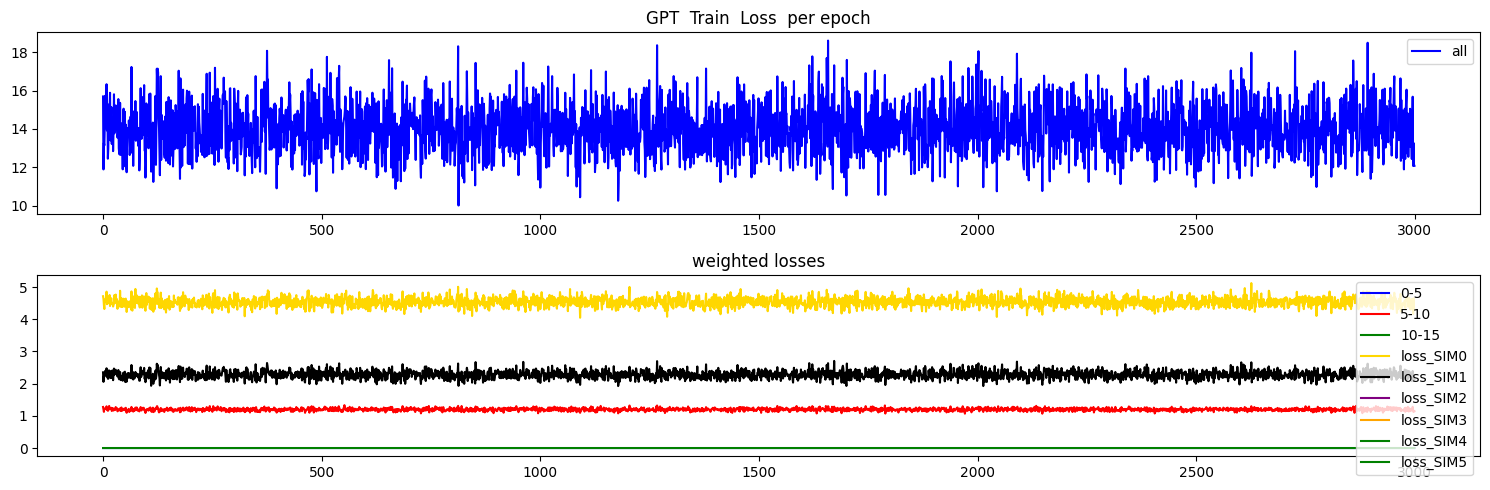

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.04605911299586296
Test MSE Loss - SI only 0-5:  0.006511129438877106
Test MSE Loss - SI only 5-10:  0.0659150704741478
Test MSE Loss - SI only 10-15:  0.03338920325040817
mae, mse, rmse, mape, mspe, rse, corr
(0.17124787, 0.04605911, 0.21461385, 1.9263384, 8.2233925, 1.3430047)
Testing R**2 - SI only:  -0.8036619287585149
Testing R**2 - SI only:  -0.8036619287585149
Testing R**2 - All features:  0.9708781622352798
Testing R**2 - (f2) - SI full:  -0.2945427368334381


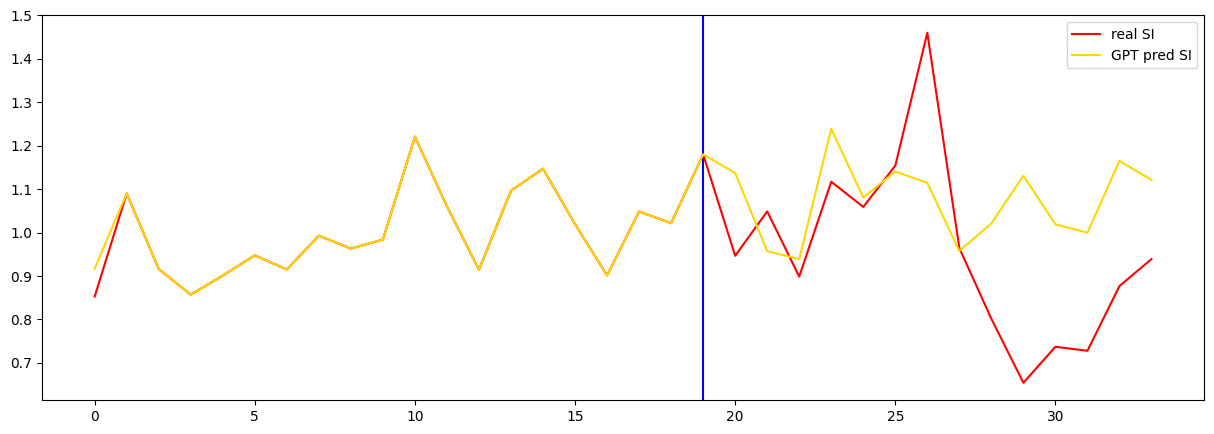

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 3


In [28]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  8.289011001586914
seq length of pred =  30
[ 3.15621058  1.5720026  10.70373917 20.87481406  0.4100639   0.3646634 ]
[tensor(0.8201, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0259, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  8.219642639160156
seq length of pred =  30
[ 3.20762348  1.56444924 10.75344164 21.29271841  0.42408226  0.37266331]
[tensor(0.8482, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0441, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  9.288476943969727
seq length of pred =  30
[ 3.24221862  1.60436826 11.07717288 21.97103592  0.44190341  0.38437317]
[tensor(0.8838, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0323, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  7.779811859130859
seq length of pred =  30
[ 3.30510278  1.54922601 10.40803244 20.67295938  0.40245334  0.36066751]
[tensor(0.8049, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0276, device='cuda:0

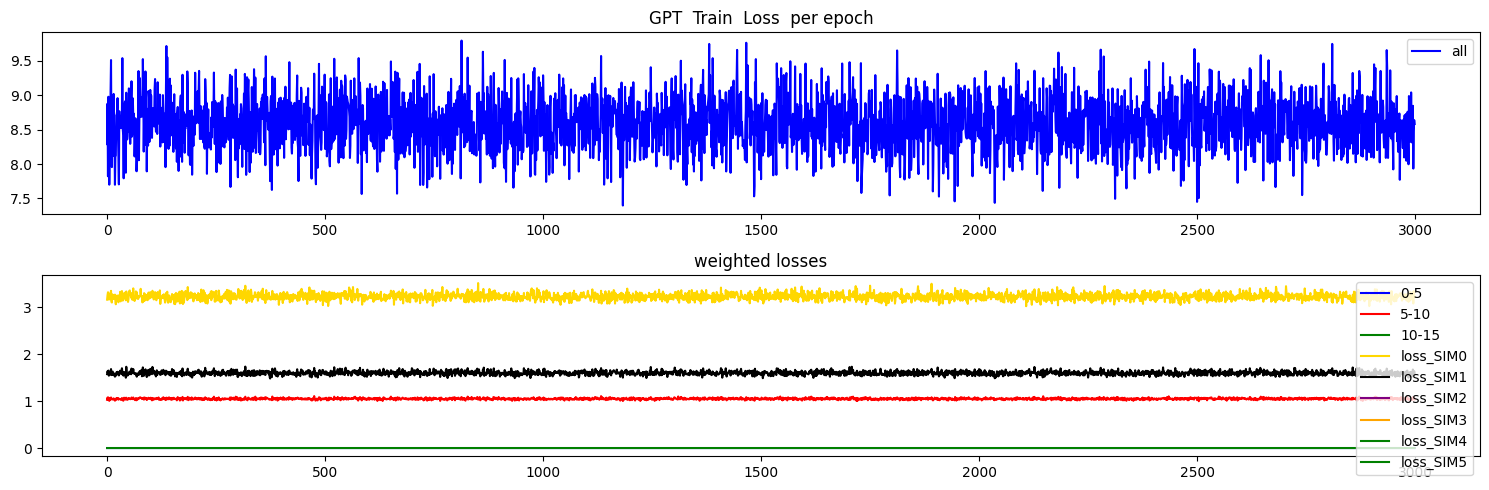

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.08576226979494095
Test MSE Loss - SI only 0-5:  0.038054078817367554
Test MSE Loss - SI only 5-10:  0.08890785276889801
Test MSE Loss - SI only 10-15:  0.059092044830322266
mae, mse, rmse, mape, mspe, rse, corr
(0.247807, 0.08576226, 0.29285195, 16.6714, 4248.427, 1.3050047)
Testing R**2 - SI only:  -0.7030374626700941
Testing R**2 - SI only:  -0.7030374626700941
Testing R**2 - All features:  0.9244616340934001
Testing R**2 - (f2) - SI full:  -2.1749404414983036


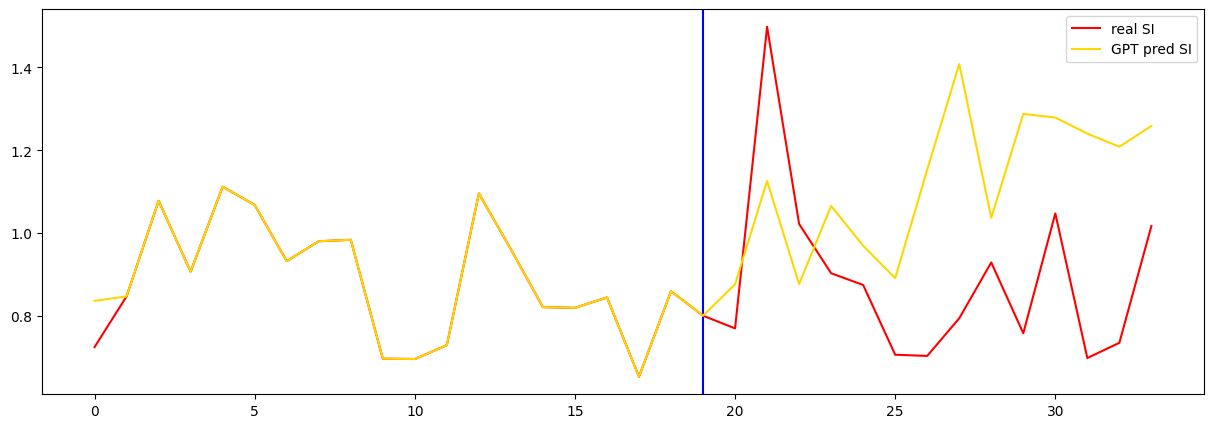

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  22.305282592773438
seq length of pred =  30
[ 4.30485327  2.82356347 10.9637395  21.43676221  0.73976643  0.37595621]
[tensor(1.4795, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2701, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  16.58269691467285
seq length of pred =  30
[ 3.65632386  2.37937927  9.84920778 19.4914097   0.5785241   0.34046575]
[tensor(1.1570, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1995, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  14.571006774902344
seq length of pred =  30
[ 3.71862298  2.17118085  9.778137   19.33698911  0.54365023  0.33846795]
[tensor(1.0873, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2097, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  15.270505905151367
seq length of pred =  30
[ 3.48065028  2.25706462  9.71207535 19.49957924  0.56220784  0.34183324]
[tensor(1.1244, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1874, device='cud

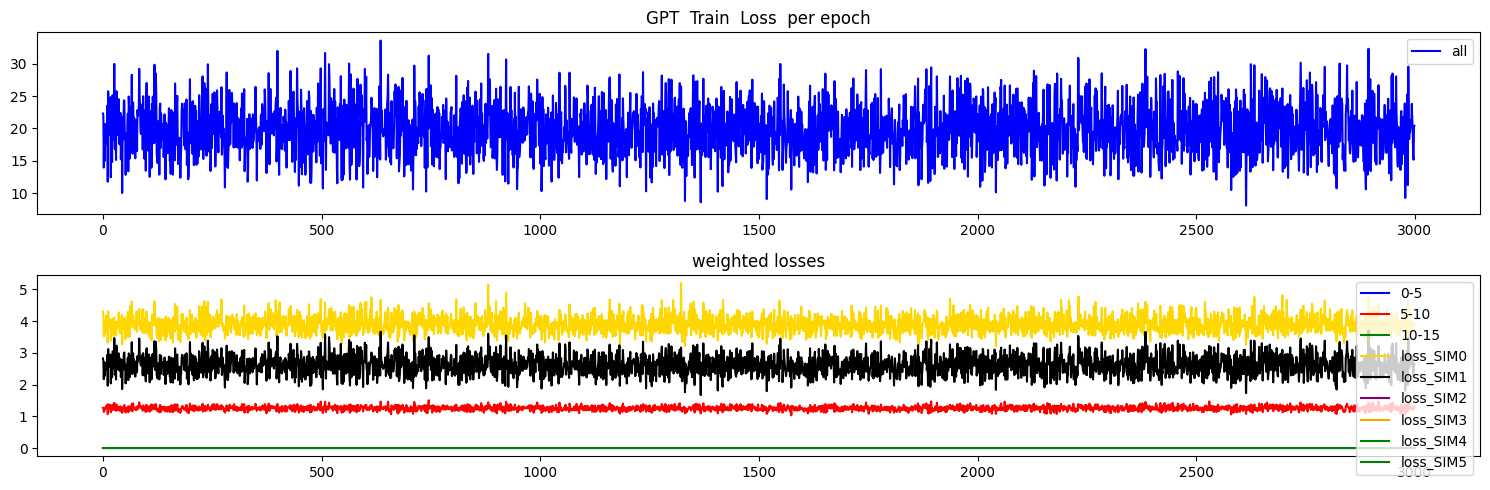

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.09029761701822281
Test MSE Loss - SI only 0-5:  0.038054078817367554
Test MSE Loss - SI only 5-10:  0.08890785276889801
Test MSE Loss - SI only 10-15:  0.059092044830322266
mae, mse, rmse, mape, mspe, rse, corr
(0.22417486, 0.09029764, 0.30049565, 16.714487, 4263.414, 1.3390665)
Testing R**2 - SI only:  -0.7930991148354336
Testing R**2 - SI only:  -0.7930991148354336
Testing R**2 - All features:  0.9603967370492614
Testing R**2 - (f2) - SI full:  -1.0621553291171089


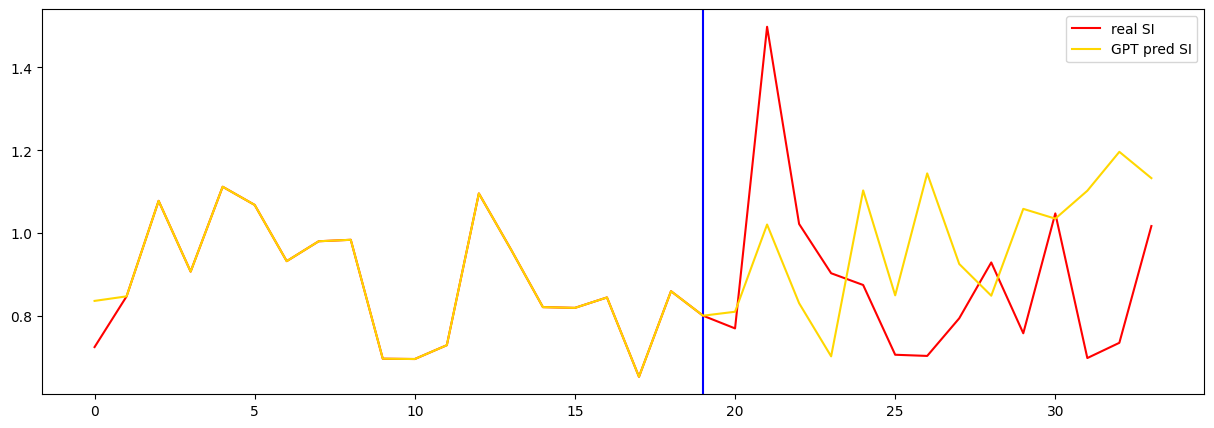

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  8.12779426574707
seq length of pred =  30
[ 3.57770617  1.58543363  9.70828746 19.69546185  0.38120327  0.34199539]
[tensor(0.7624, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0254, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  13.66421127319336
seq length of pred =  30
[ 3.8919231   2.07158826 10.56899679 20.74901082  0.51400213  0.36120396]
[tensor(1.0280, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0583, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  24.712242126464844
seq length of pred =  30
[ 4.30134095  2.81819239 11.38305438 22.27512001  0.73880728  0.38702085]
[tensor(1.4776, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2065, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  15.400217056274414
seq length of pred =  30
[ 3.93128626  2.13112516 10.5387518  20.45366971  0.52805341  0.35514871]
[tensor(1.0561, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0437, device='cuda:

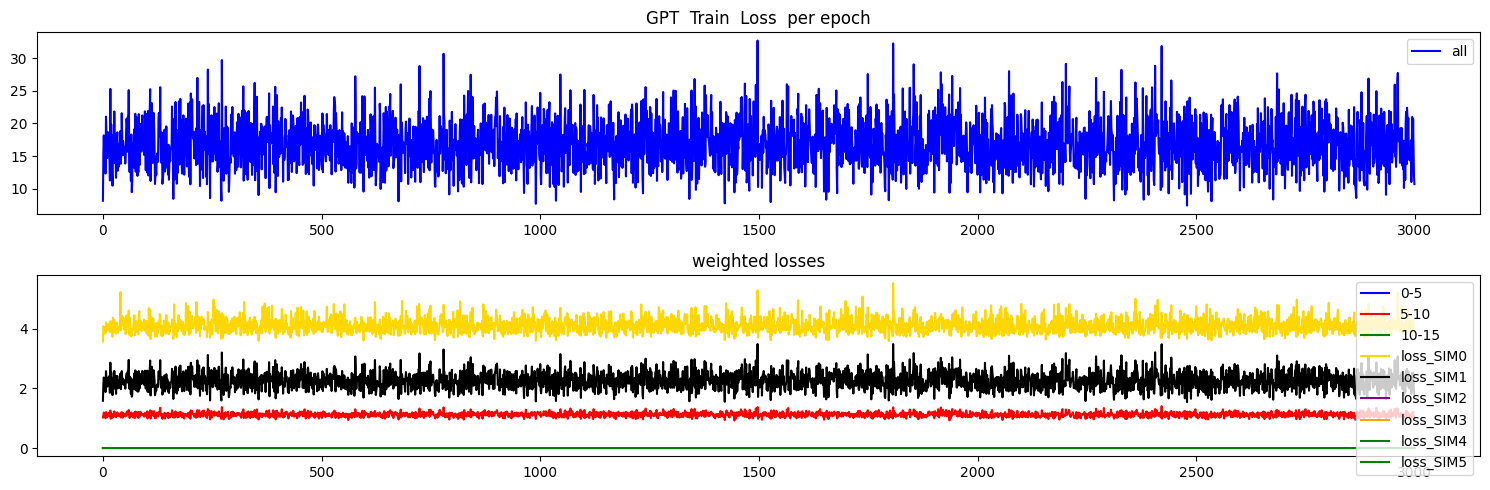

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.08313220739364624
Test MSE Loss - SI only 0-5:  0.038054078817367554
Test MSE Loss - SI only 5-10:  0.08890785276889801
Test MSE Loss - SI only 10-15:  0.059092044830322266
mae, mse, rmse, mape, mspe, rse, corr
(0.23222595, 0.08313221, 0.28832656, 16.782251, 4257.627, 1.2848388)
Testing R**2 - SI only:  -0.6508107082291865
Testing R**2 - SI only:  -0.6508107082291865
Testing R**2 - All features:  0.9759709107321624
Testing R**2 - (f2) - SI full:  -0.5701277462948682


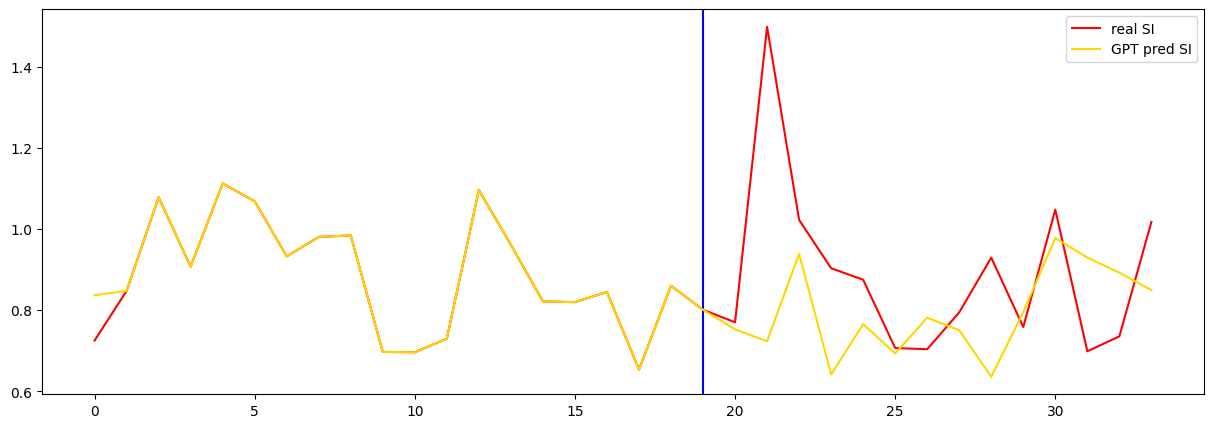

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  16.45255470275879
seq length of pred =  30
[ 4.17136424  2.20496333 10.06131411 21.26623655  0.57344389  0.37051186]
[tensor(1.1469, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0929, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  17.737966537475586
seq length of pred =  30
[ 4.23064591  2.31527283 10.64517156 21.96386747  0.64686683  0.38701216]
[tensor(1.2937, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1698, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  12.800365447998047
seq length of pred =  30
[ 4.02090593  1.95306911  9.66642654 21.15519848  0.52394921  0.37283163]
[tensor(1.0479, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1213, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  21.177936553955078
seq length of pred =  30
[ 4.44869719  2.54360015 10.79325415 22.11650045  0.71881892  0.38828689]
[tensor(1.4376, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2590, device='cud

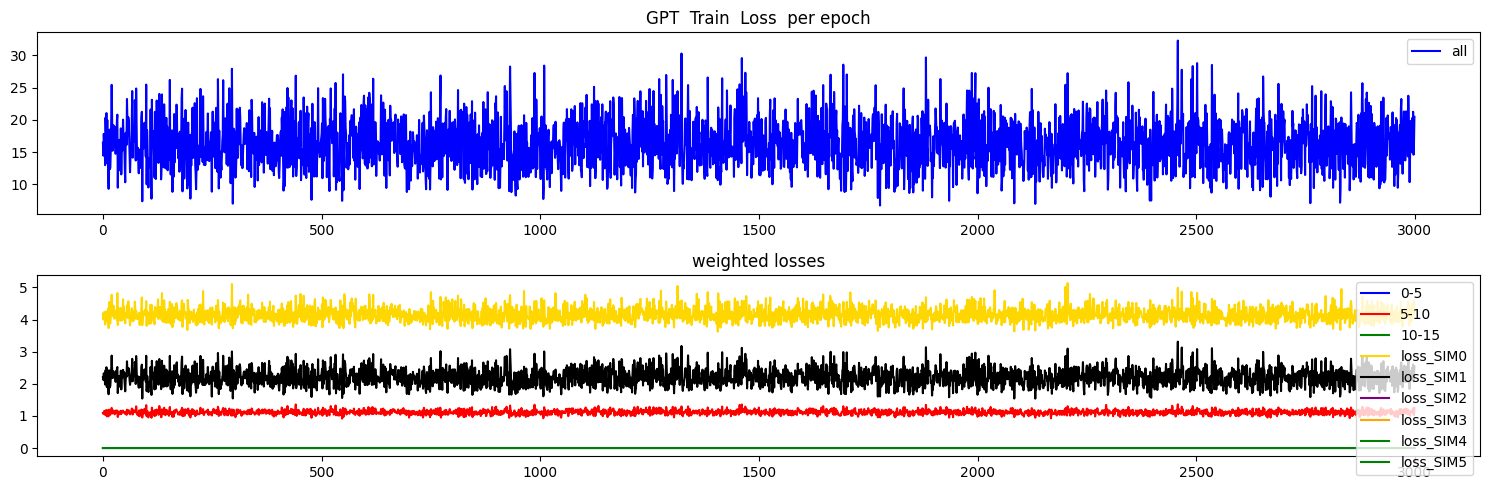

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.08371223509311676
Test MSE Loss - SI only 0-5:  0.038054078817367554
Test MSE Loss - SI only 5-10:  0.08890785276889801
Test MSE Loss - SI only 10-15:  0.059092044830322266
mae, mse, rmse, mape, mspe, rse, corr
(0.24198835, 0.08371224, 0.2893307, 16.64718, 4241.428, 1.2893133)
Testing R**2 - SI only:  -0.6623287541441185
Testing R**2 - SI only:  -0.6623287541441185
Testing R**2 - All features:  0.9741210795243395
Testing R**2 - (f2) - SI full:  -0.23207268949032156


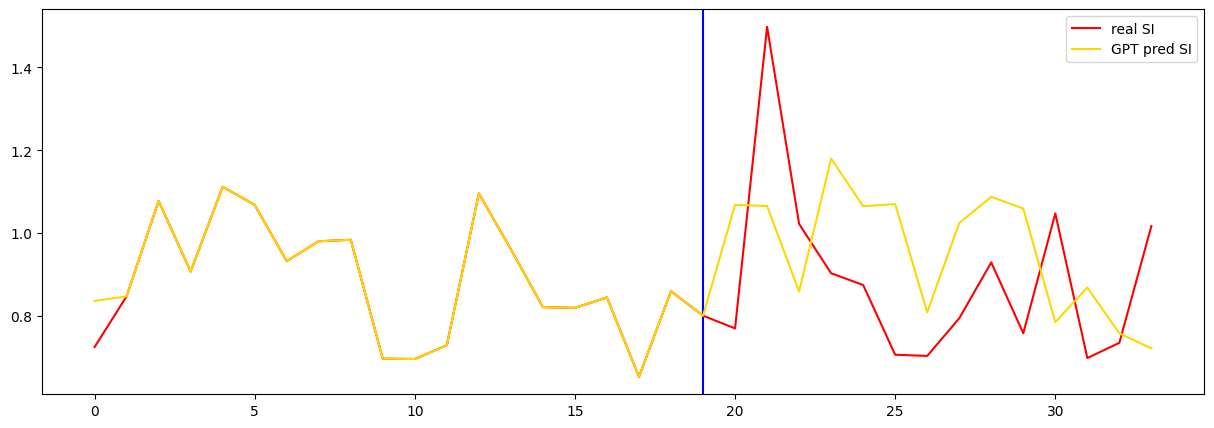

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 4


In [33]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  23.190383911132812
seq length of pred =  30
[ 4.46243723  2.81325981 17.43146069 30.40644006  0.98831729  0.54501682]
[tensor(1.9766, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4752, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  20.557086944580078
seq length of pred =  30
[ 4.21850219  2.60295008 17.4013407  30.2914409   0.97038747  0.5467313 ]
[tensor(1.9408, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3985, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  22.975353240966797
seq length of pred =  30
[ 4.54307105  2.70783954 17.52689913 30.63142738  1.04625057  0.55650221]
[tensor(2.0925, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4550, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  20.563228607177734
seq length of pred =  30
[ 4.14067216  2.62126249 17.07822642 30.53024837  1.02382155  0.55794949]
[tensor(2.0476, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4448, device='cu

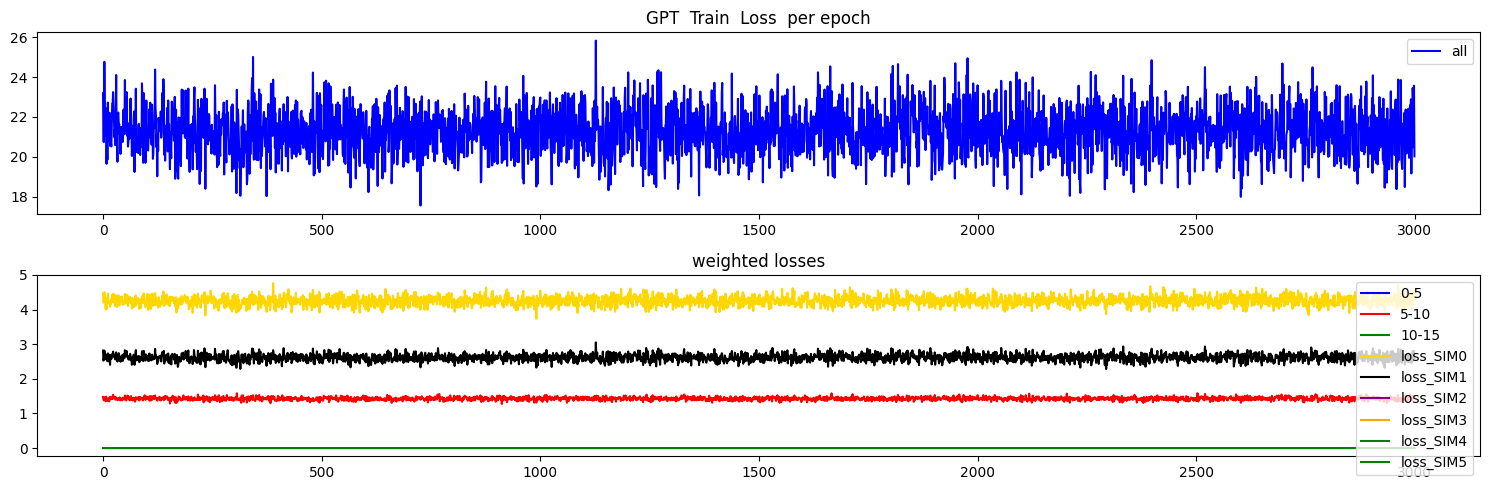

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.06013232097029686
Test MSE Loss - SI only 0-5:  0.06056167930364609
Test MSE Loss - SI only 5-10:  0.029538864269852638
Test MSE Loss - SI only 10-15:  0.07658904790878296
mae, mse, rmse, mape, mspe, rse, corr
(0.20234244, 0.06013232, 0.24521892, 17.8114, 6126.6123, 1.3231874)
Testing R**2 - SI only:  -0.7508245600932602
Testing R**2 - SI only:  -0.7508245600932602
Testing R**2 - All features:  0.9936921492983188
Testing R**2 - (f2) - SI full:  -0.33175062086727514


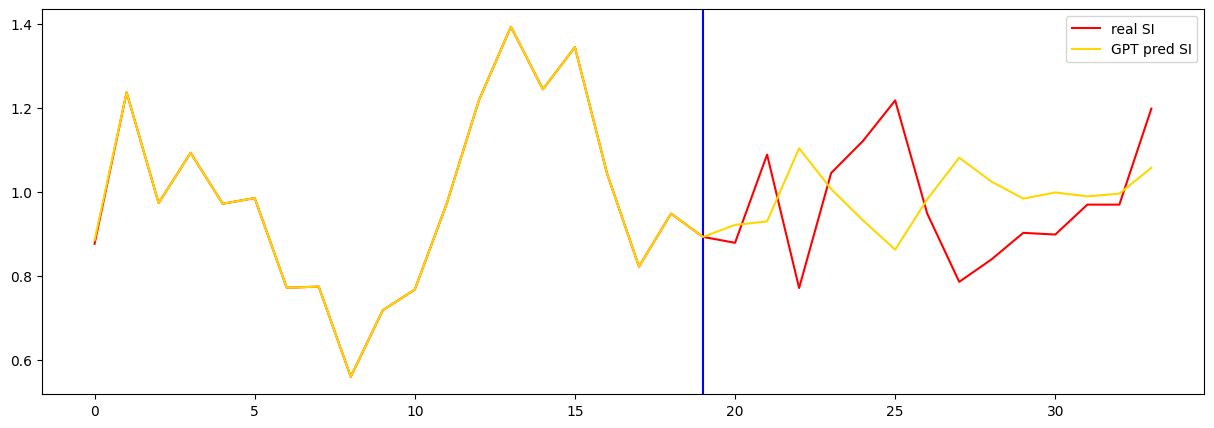

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  11.080127716064453
seq length of pred =  30
[ 4.54928994  2.07393398 11.51802989 19.76804062  0.43224936  0.34223437]
[tensor(0.8645, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0916, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  12.07059097290039
seq length of pred =  30
[ 4.67321223  2.22595096 11.7638335  20.01752953  0.44659877  0.34597183]
[tensor(0.8932, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1131, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  12.156116485595703
seq length of pred =  30
[ 4.7668379   2.24753592 11.72741883 19.68246846  0.43848208  0.34015329]
[tensor(0.8770, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1079, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  11.741442680358887
seq length of pred =  30
[ 4.81239364  2.17376694 12.2337363  20.01029573  0.44569584  0.3470449 ]
[tensor(0.8914, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1478, device='cud

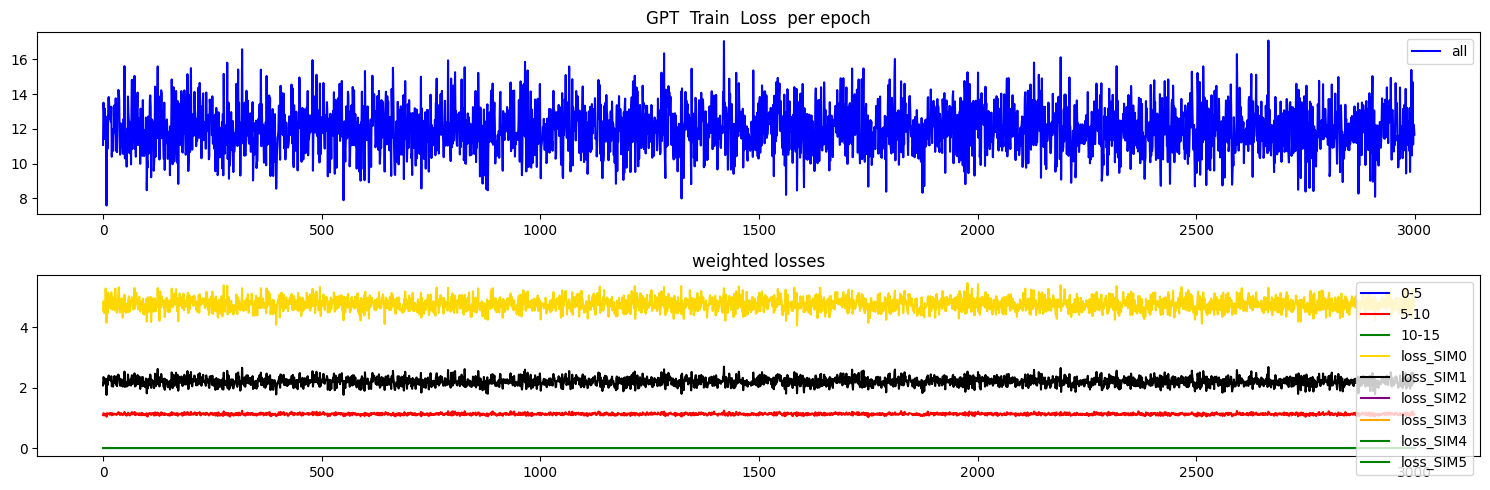

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.0621713250875473
Test MSE Loss - SI only 0-5:  0.06056169420480728
Test MSE Loss - SI only 5-10:  0.029538864269852638
Test MSE Loss - SI only 10-15:  0.07658903300762177
mae, mse, rmse, mape, mspe, rse, corr
(0.21015535, 0.062171318, 0.24934177, 24.21814, 12131.767, 1.345434)
Testing R**2 - SI only:  -0.8101925939413894
Testing R**2 - SI only:  -0.8101925939413894
Testing R**2 - All features:  0.9826942638830508
Testing R**2 - (f2) - SI full:  -0.8411893109724702


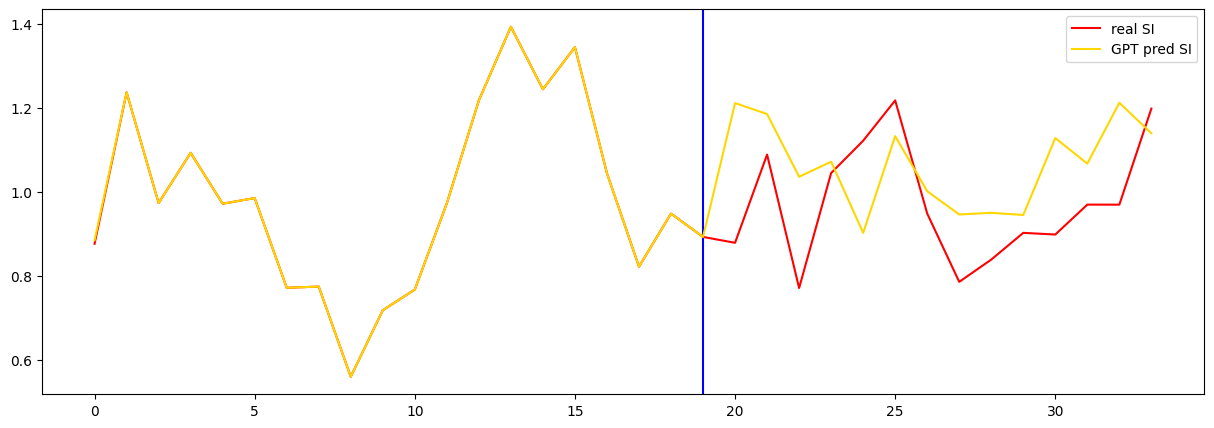

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  16.49394416809082
seq length of pred =  30
[ 3.34278341  2.27293789 12.69237006 25.92370144  0.73286256  0.46632249]
[tensor(1.4657, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1561, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  19.05847930908203
seq length of pred =  30
[ 3.28366911  2.44707103 13.53054483 27.23435024  0.82333816  0.48954607]
[tensor(1.6467, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1780, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  18.541278839111328
seq length of pred =  30
[ 3.55151319  2.3431339  13.63010472 26.60860417  0.76997498  0.47562833]
[tensor(1.5399, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1915, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  19.04770278930664
seq length of pred =  30
[ 3.41552289  2.47699137 13.88622784 27.73134629  0.82174731  0.49736996]
[tensor(1.6435, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1984, device='cuda:

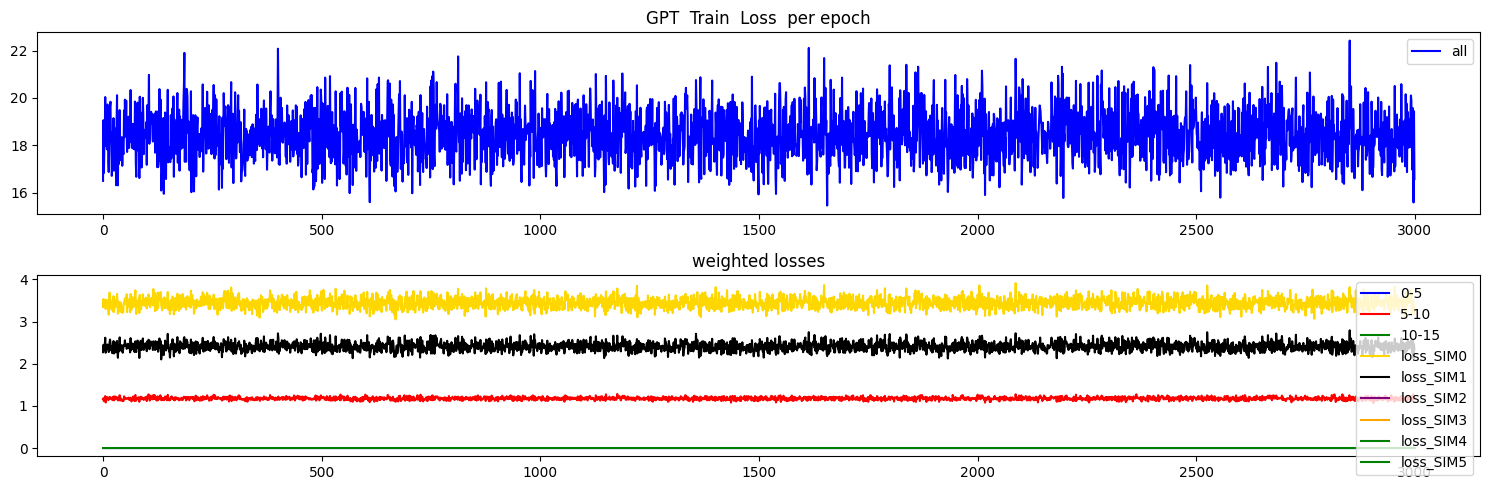

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.06516703218221664
Test MSE Loss - SI only 0-5:  0.06056167930364609
Test MSE Loss - SI only 5-10:  0.029538864269852638
Test MSE Loss - SI only 10-15:  0.07658904790878296
mae, mse, rmse, mape, mspe, rse, corr
(0.21222293, 0.06516704, 0.25527835, 12.486869, 2031.244, 1.3774675)
Testing R**2 - SI only:  -0.8974163181347541
Testing R**2 - SI only:  -0.8974163181347541
Testing R**2 - All features:  0.9899628655308859
Testing R**2 - (f2) - SI full:  -1.3894347630804988


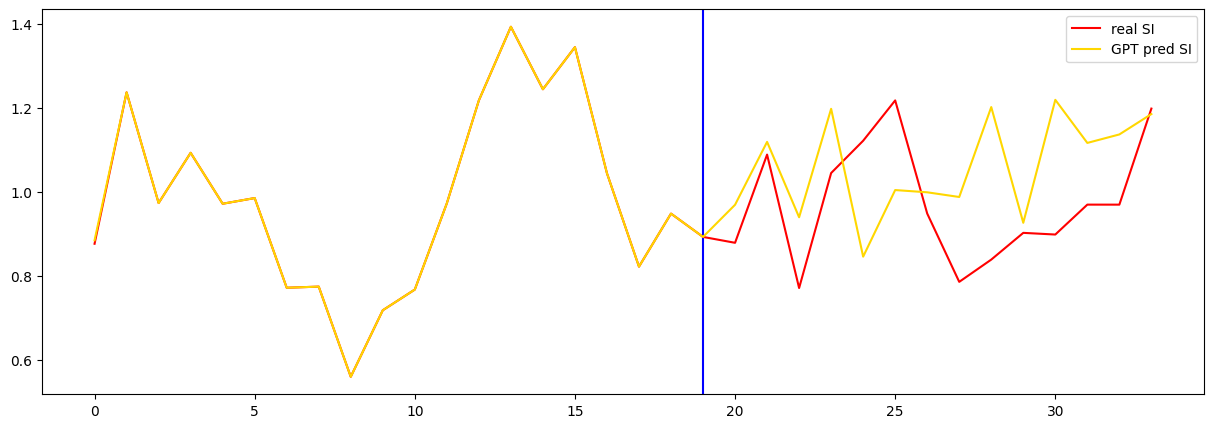

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  12.031925201416016
seq length of pred =  30
[ 5.06006314  2.12761722 13.06475178 22.72137184  0.52948535  0.39591954]
[tensor(1.0590, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2060, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  12.500659942626953
seq length of pred =  30
[ 4.92438328  2.23839914 13.08728377 22.45734753  0.52964899  0.39060917]
[tensor(1.0593, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1444, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  12.275238037109375
seq length of pred =  30
[ 5.14933665  2.08640921 12.8837149  22.46975177  0.50568434  0.39015548]
[tensor(1.0114, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1574, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  12.88300895690918
seq length of pred =  30
[ 5.03202649  2.14800319 13.24153687 23.06515056  0.53709053  0.40017099]
[tensor(1.0742, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1789, device='cud

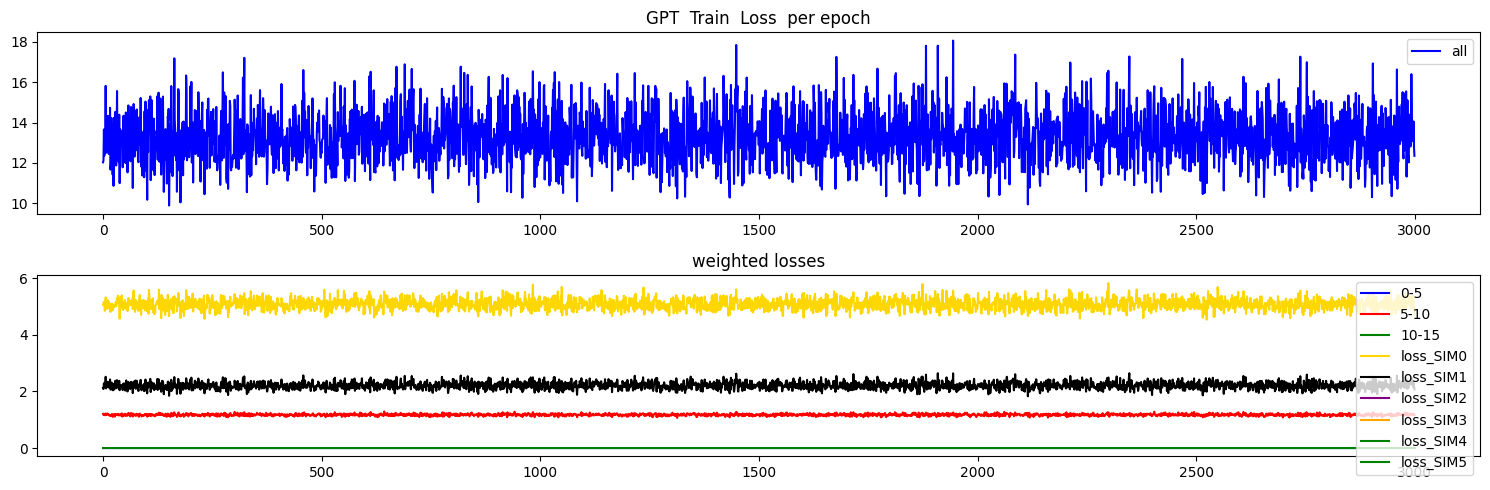

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.06316865235567093
Test MSE Loss - SI only 0-5:  0.06056167930364609
Test MSE Loss - SI only 5-10:  0.029538864269852638
Test MSE Loss - SI only 10-15:  0.07658904790878296
mae, mse, rmse, mape, mspe, rse, corr
(0.21050994, 0.06316865, 0.25133374, 73.0466, 161168.6, 1.3561826)
Testing R**2 - SI only:  -0.8392309660495672
Testing R**2 - SI only:  -0.8392309660495672
Testing R**2 - All features:  0.9961641261809163
Testing R**2 - (f2) - SI full:  0.047001570004943205


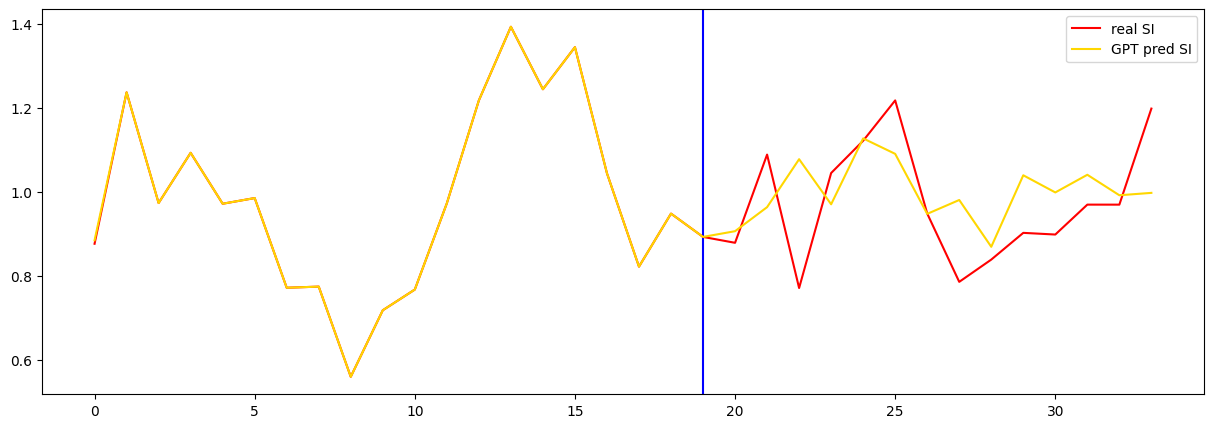

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 5


In [38]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  27.69586944580078
seq length of pred =  30
[ 4.18640856  2.78397323 18.09683731 34.36967524  1.38231959  0.66479908]
[tensor(2.7646, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5658, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  25.92932891845703
seq length of pred =  30
[ 4.17216498  2.62934525 17.84862278 33.48997389  1.3260531   0.6464383 ]
[tensor(2.6521, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5558, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  26.40999984741211
seq length of pred =  30
[ 4.21038262  2.66032261 18.30407529 34.02038553  1.40339415  0.66815245]
[tensor(2.8068, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5784, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  24.745595932006836
seq length of pred =  30
[ 3.90941599  2.60483088 17.56019731 33.02924033  1.33879175  0.64987562]
[tensor(2.6776, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5165, device='cuda:

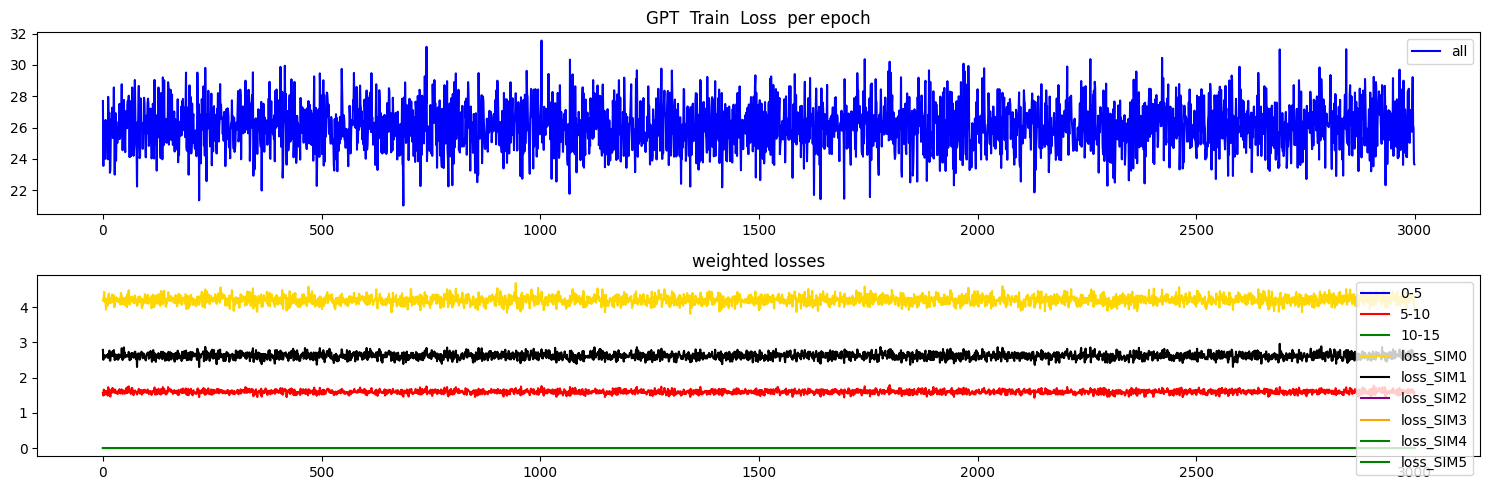

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.08281400799751282
Test MSE Loss - SI only 0-5:  0.0600794181227684
Test MSE Loss - SI only 5-10:  0.255085289478302
Test MSE Loss - SI only 10-15:  0.04853219911456108
mae, mse, rmse, mape, mspe, rse, corr
(0.21520603, 0.082814015, 0.28777424, 15.362596, 5413.9136, 1.5616219)
Testing R**2 - SI only:  -1.4386631727032557
Testing R**2 - SI only:  -1.4386631727032557
Testing R**2 - All features:  0.9938971459996443
Testing R**2 - (f2) - SI full:  -1.011654023443699


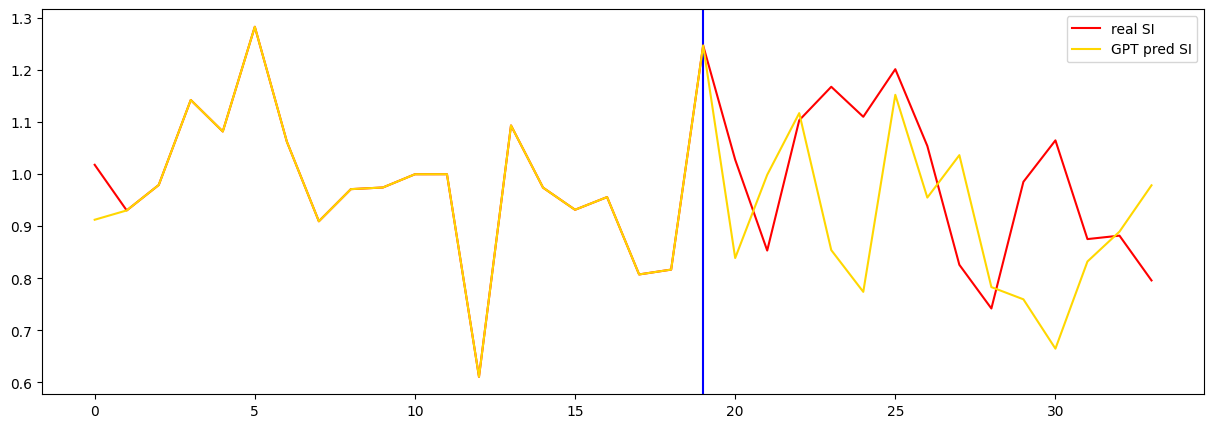

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  22.541316986083984
seq length of pred =  30
[ 3.86665992  2.51731383 15.67671933 30.18064622  1.05633705  0.56431693]
[tensor(2.1127, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3705, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  20.996004104614258
seq length of pred =  30
[ 4.0111868   2.35208838 15.55252016 30.65176431  1.1132346   0.58520577]
[tensor(2.2265, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3143, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  20.388736724853516
seq length of pred =  30
[ 3.95480508  2.33936838 15.55442104 29.26384184  1.03736298  0.55716837]
[tensor(2.0747, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2851, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  20.782569885253906
seq length of pred =  30
[ 3.83830061  2.41656037 15.15212139 29.21096714  1.03547722  0.55542711]
[tensor(2.0710, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2838, device='cu

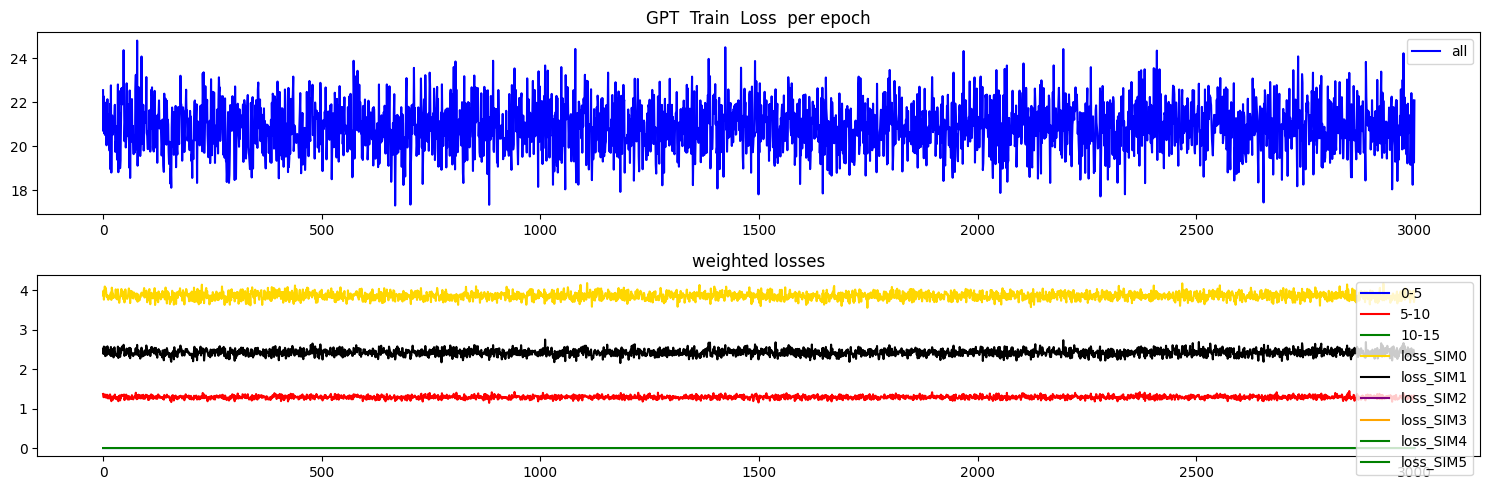

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.07970087230205536
Test MSE Loss - SI only 0-5:  0.060079414397478104
Test MSE Loss - SI only 5-10:  0.255085289478302
Test MSE Loss - SI only 10-15:  0.04853219538927078
mae, mse, rmse, mape, mspe, rse, corr
(0.2078975, 0.07970087, 0.28231344, 15.408769, 5415.0454, 1.5319885)
Testing R**2 - SI only:  -1.3469890256242363
Testing R**2 - SI only:  -1.3469890256242363
Testing R**2 - All features:  0.9882850260245939
Testing R**2 - (f2) - SI full:  -0.9385098897375421


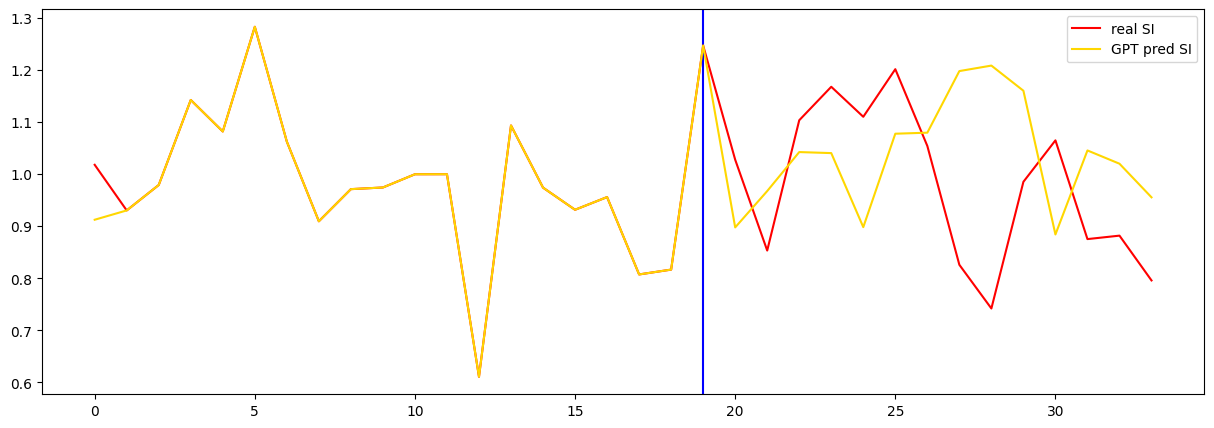

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  13.357210159301758
seq length of pred =  30
[ 5.65549062  2.19516082 12.01794297 22.48038346  0.5341538   0.39156547]
[tensor(1.0683, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1750, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  13.55718994140625
seq length of pred =  30
[ 5.58716133  2.31704842 12.76578243 23.34718808  0.56846764  0.40800248]
[tensor(1.1369, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1598, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  13.465916633605957
seq length of pred =  30
[ 5.53067049  2.22241615 13.11114112 23.04085182  0.54578832  0.40038726]
[tensor(1.0916, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2265, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  17.210338592529297
seq length of pred =  30
[ 5.80842127  2.62533309 13.22657429 23.0879591   0.63276794  0.40415456]
[tensor(1.2655, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2872, device='cud

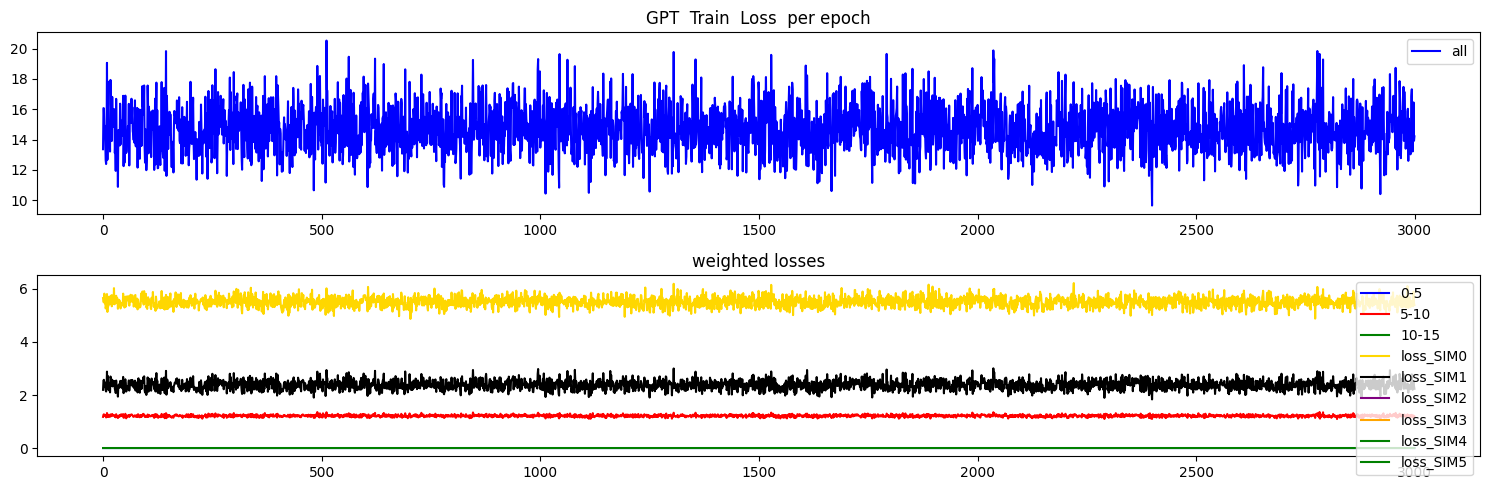

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.09710594266653061
Test MSE Loss - SI only 0-5:  0.060079433023929596
Test MSE Loss - SI only 5-10:  0.255085289478302
Test MSE Loss - SI only 10-15:  0.04853220283985138
mae, mse, rmse, mape, mspe, rse, corr
(0.24524008, 0.09710594, 0.31161827, 15.548816, 5414.629, 1.6910129)
Testing R**2 - SI only:  -1.8595241984272732
Testing R**2 - SI only:  -1.8595241984272732
Testing R**2 - All features:  0.9845738515825707
Testing R**2 - (f2) - SI full:  0.12602393500689646


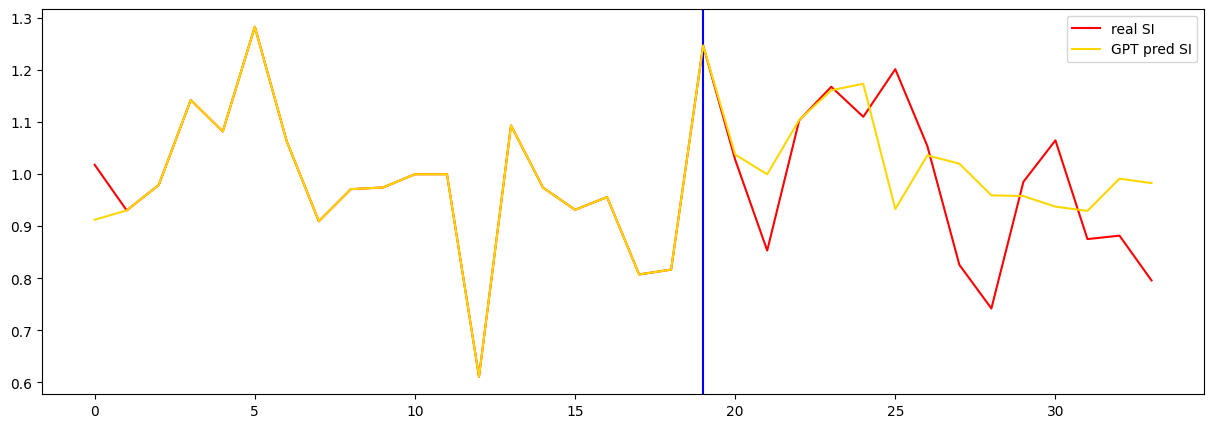

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  17.388545989990234
seq length of pred =  30
[ 4.88130377  2.60369861 13.10882072 23.90105471  0.61956762  0.41663334]
[tensor(1.2391, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2292, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.791471481323242
seq length of pred =  30
[ 4.91318455  2.4251799  12.70990266 23.43997727  0.61224751  0.41077159]
[tensor(1.2245, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2450, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  16.70071029663086
seq length of pred =  30
[ 5.10267609  2.50413143 12.83696823 23.80542203  0.63380625  0.41653488]
[tensor(1.2676, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2495, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  16.659969329833984
seq length of pred =  30
[ 4.59838243  2.53499847 12.91650666 23.79298654  0.62241568  0.41613771]
[tensor(1.2448, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2690, device='cud

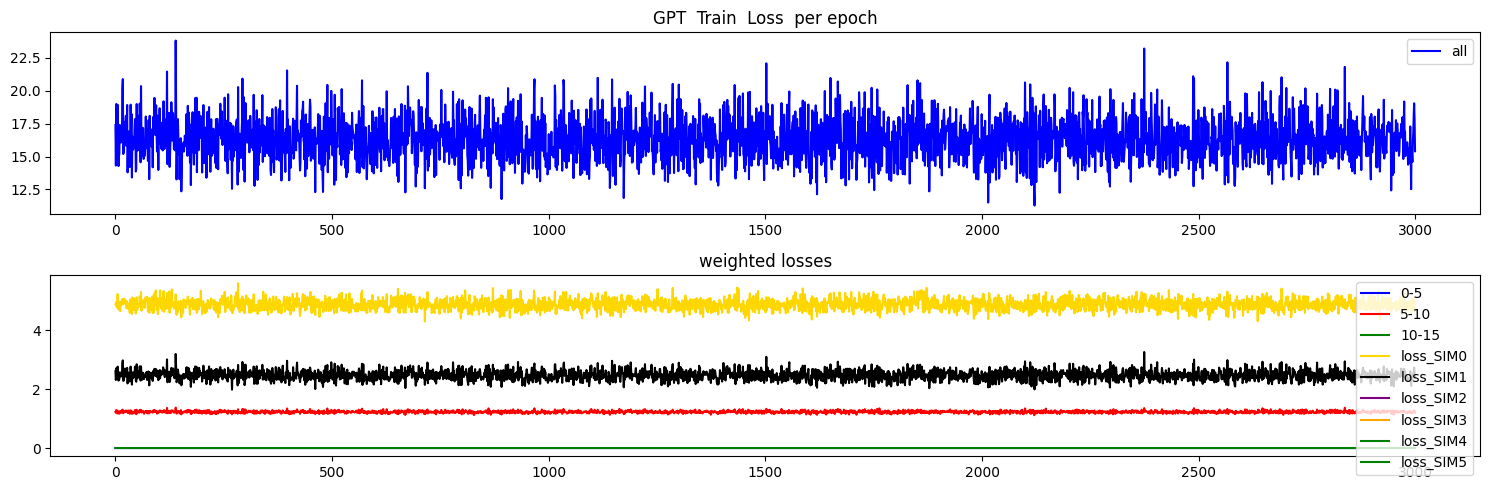

max tokens  14
torch.Size([1, 20, 35])
(34,)
(34,)
Test MSE Loss - SI only:  0.09143465012311935
Test MSE Loss - SI only 0-5:  0.0600794181227684
Test MSE Loss - SI only 5-10:  0.255085289478302
Test MSE Loss - SI only 10-15:  0.04853219911456108
mae, mse, rmse, mape, mspe, rse, corr
(0.22945789, 0.09143465, 0.30238163, 16.108112, 5437.7617, 1.6408898)
Testing R**2 - SI only:  -1.6925189980393598
Testing R**2 - SI only:  -1.6925189980393598
Testing R**2 - All features:  0.9840143894710167
Testing R**2 - (f2) - SI full:  -0.013696164339976225


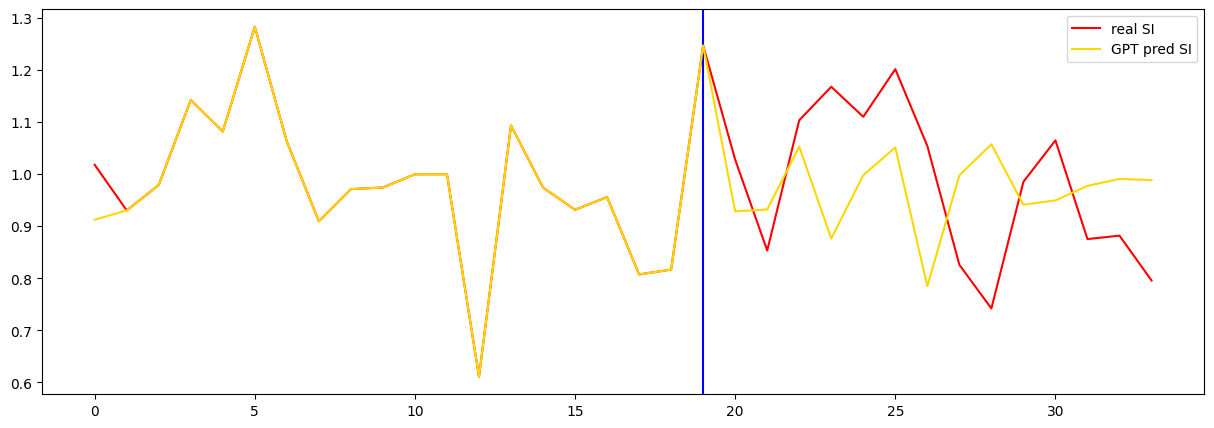

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  18.56549835205078
seq length of pred =  30
[ 4.87124677  2.39478053 15.28342723 27.74333952  0.77877825  0.4920101 ]
[tensor(1.5576, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3240, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  18.535858154296875
seq length of pred =  30
[ 4.75959139  2.31881084 14.80418476 28.36318996  0.79541735  0.50618947]
[tensor(1.5908, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2925, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  17.635150909423828
seq length of pred =  30
[ 4.75159508  2.32313479 15.53533525 27.85561032  0.79179979  0.50029924]
[tensor(1.5836, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3066, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  17.627933502197266
seq length of pred =  30
[ 4.67506399  2.31508436 15.26936341 28.35853891  0.80667241  0.50644247]
[tensor(1.6133, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3257, device='cud

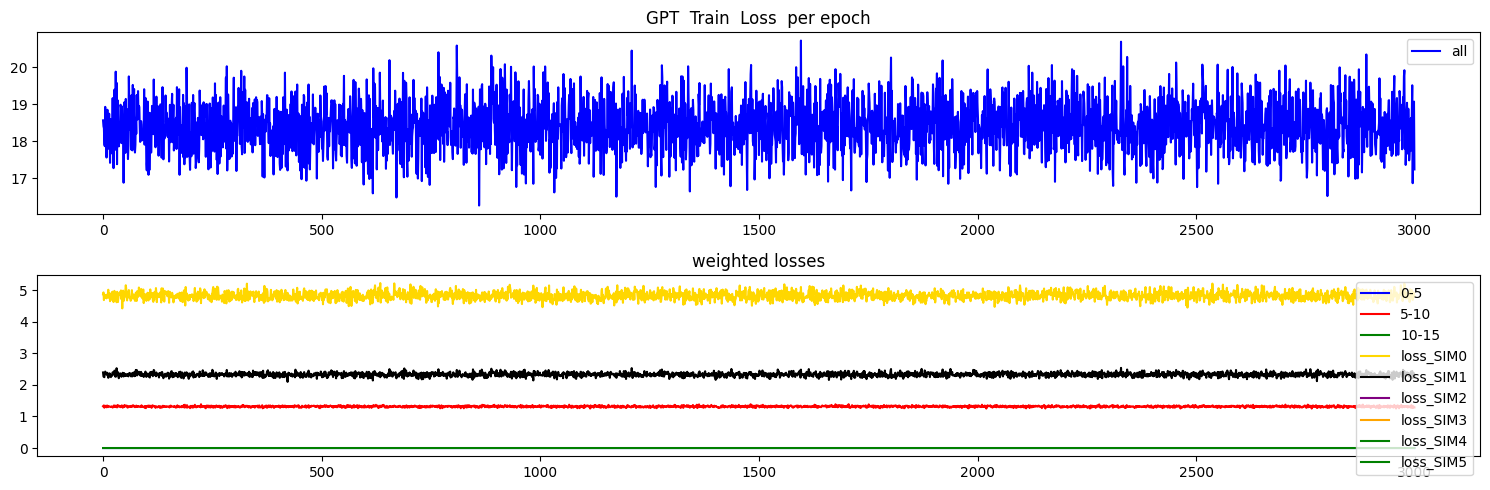

max tokens  29
torch.Size([1, 20, 35])
(49,)
(49,)
Test MSE Loss - SI only:  0.03465354070067406
Test MSE Loss - SI only 0-5:  0.008092202246189117
Test MSE Loss - SI only 5-10:  0.01254258118569851
Test MSE Loss - SI only 10-15:  0.16530302166938782
mae, mse, rmse, mape, mspe, rse, corr
(0.14193861, 0.03465355, 0.18615463, 3.3699932, 52.705338, 1.5313294)
Testing R**2 - SI only:  -1.3449692490370033
Testing R**2 - SI only:  -1.3449692490370033
Testing R**2 - All features:  0.9986446633829014
Testing R**2 - (f2) - SI full:  -0.0132763264281206


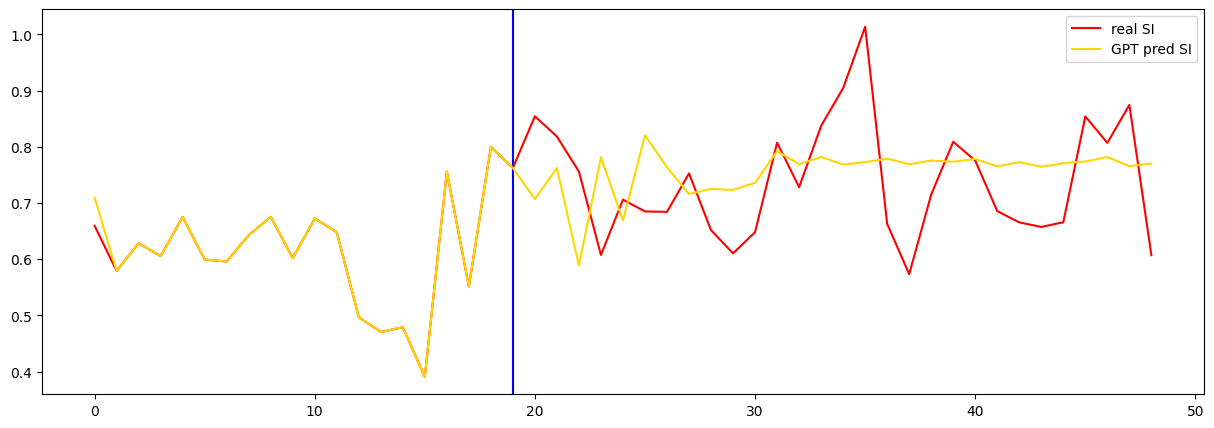

In [43]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


0 train loss =  24.965770721435547
seq length of pred =  30
[ 6.3303409   2.82321105 15.12971012 28.81347462  0.87684755  0.51214532]
[tensor(1.7537, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4322, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  22.982898712158203
seq length of pred =  30
[ 5.9884896   2.66853294 15.09003816 27.33640845  0.80763999  0.48250491]
[tensor(1.6153, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3873, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  23.796672821044922
seq length of pred =  30
[ 6.25528004  2.71864683 15.07114998 28.05530633  0.81695688  0.49422102]
[tensor(1.6339, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3794, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  23.413089752197266
seq length of pred =  30
[ 5.89545031  2.75560489 15.59561146 28.56687885  0.87191968  0.50802487]
[tensor(1.7438, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3888, device='cu

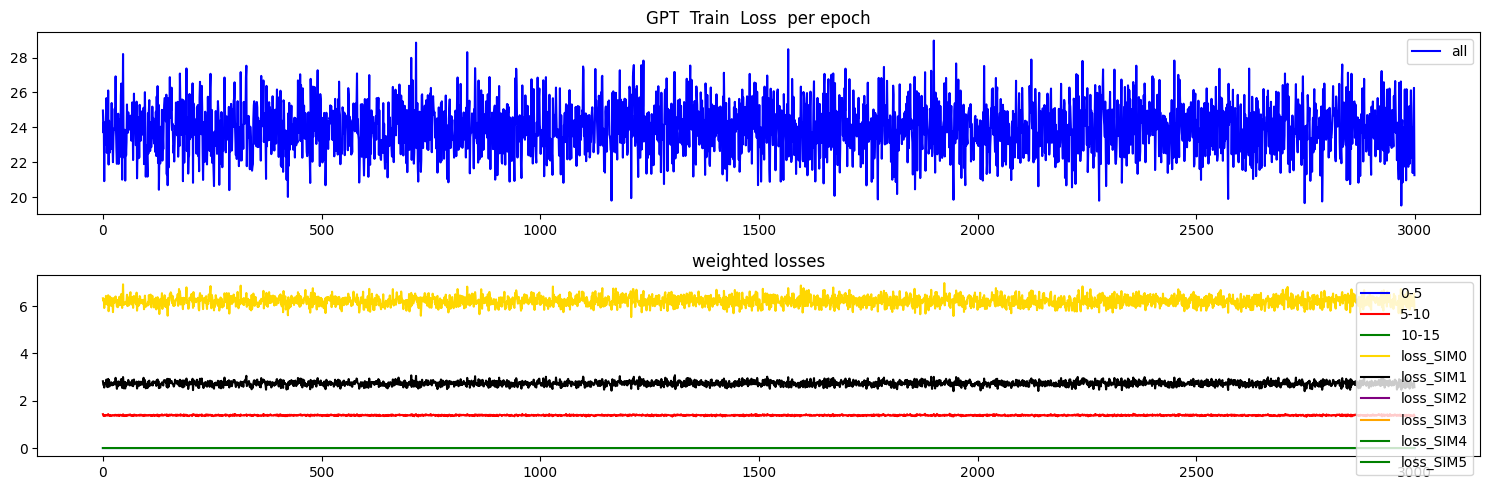

max tokens  29
torch.Size([1, 20, 35])
(49,)
(49,)
Test MSE Loss - SI only:  0.059106599539518356
Test MSE Loss - SI only 0-5:  0.22106842696666718
Test MSE Loss - SI only 5-10:  0.10422805696725845
Test MSE Loss - SI only 10-15:  0.08848223835229874
mae, mse, rmse, mape, mspe, rse, corr
(0.16259393, 0.059106607, 0.24311851, 4.434729, 198.10826, 1.42916)
Testing R**2 - SI only:  -1.04249810602417
Testing R**2 - SI only:  -1.04249810602417
Testing R**2 - All features:  0.9963230799481634
Testing R**2 - (f2) - SI full:  -1.0107249914775749


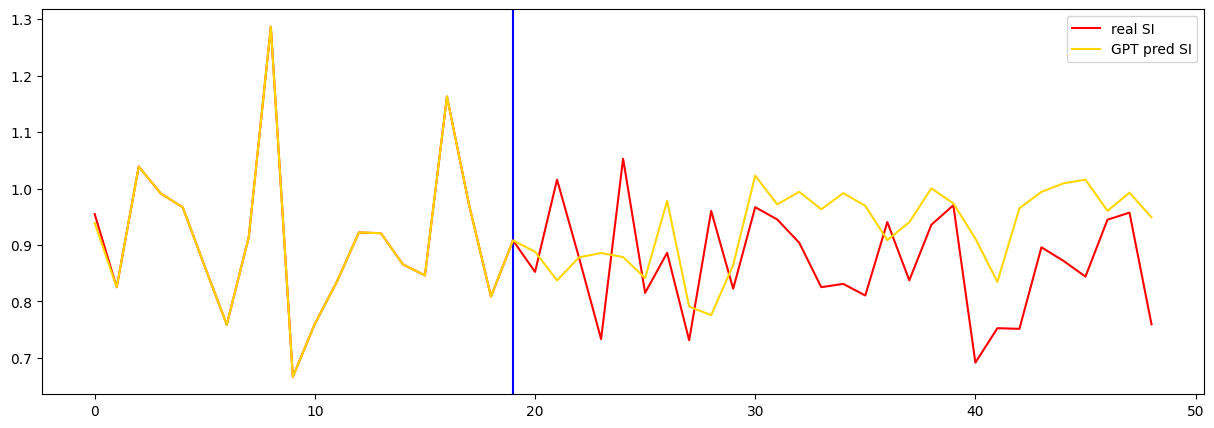

In [44]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


0 train loss =  12.290328025817871
seq length of pred =  30
[ 4.770845    2.09943266 10.15118586 21.78205505  0.52962668  0.38529508]
[tensor(1.0593, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0894, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.049967765808105
seq length of pred =  30
[ 5.6576009   2.29158056 11.5676983  22.97070572  0.60297515  0.4073823 ]
[tensor(1.2060, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1193, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  14.104521751403809
seq length of pred =  30
[ 5.04147378  2.34947219 11.40335914 22.75126098  0.59238744  0.40205437]
[tensor(1.1848, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1073, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  15.003751754760742
seq length of pred =  30
[ 5.11877723  2.32594687 11.72793051 23.2964169   0.61231068  0.40930598]
[tensor(1.2246, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1100, device='cu

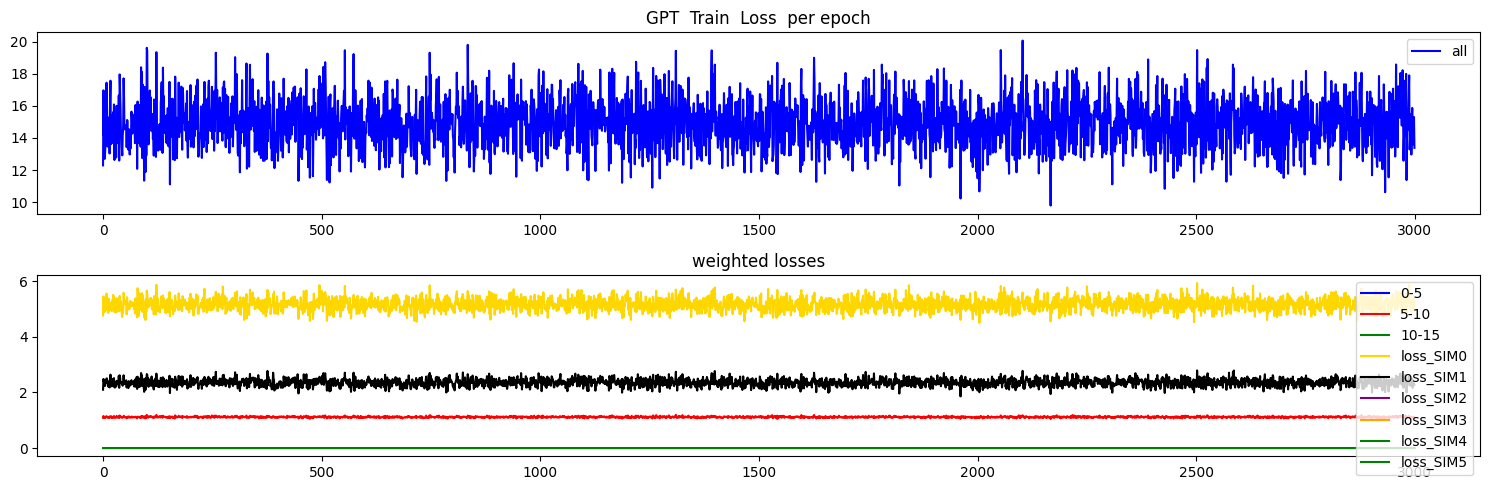

max tokens  29
torch.Size([1, 20, 35])
(49,)
(49,)
Test MSE Loss - SI only:  0.04530266672372818
Test MSE Loss - SI only 0-5:  0.061075884848833084
Test MSE Loss - SI only 5-10:  0.12192519009113312
Test MSE Loss - SI only 10-15:  0.04934253543615341
mae, mse, rmse, mape, mspe, rse, corr
(0.1653288, 0.045302663, 0.21284422, 2.2030826, 13.15232, 1.1870657)
Testing R**2 - SI only:  -0.4091250470036496
Testing R**2 - SI only:  -0.4091250470036496
Testing R**2 - All features:  0.9565108959288845
Testing R**2 - (f2) - SI full:  -0.054499060162044755


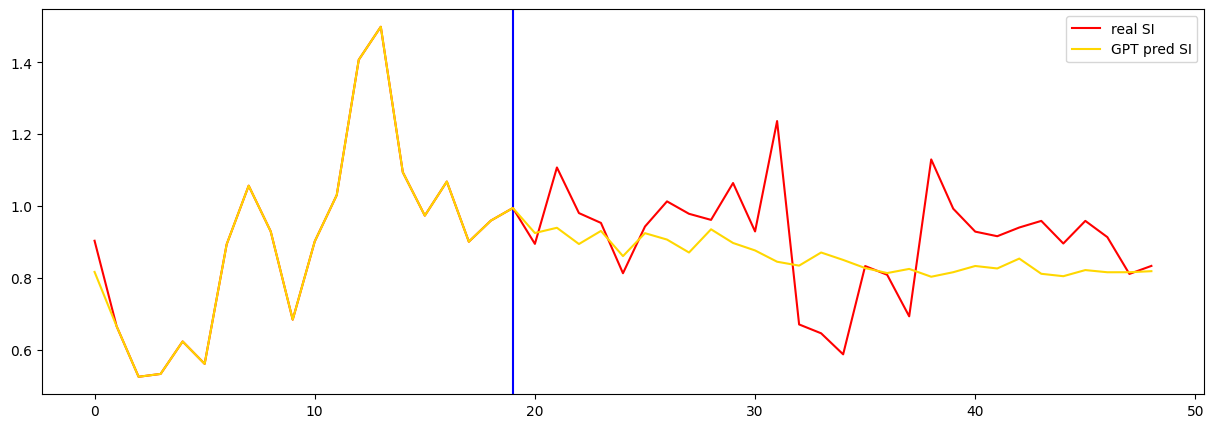

In [45]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


0 train loss =  13.956972122192383
seq length of pred =  30
[ 4.3531231   2.16429125 12.37018415 23.76564626  0.59192505  0.41890818]
[tensor(1.1839, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0676, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  13.367578506469727
seq length of pred =  30
[ 4.38959182  2.0663228  12.01565434 23.38542484  0.56696697  0.41153633]
[tensor(1.1339, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0441, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  16.666912078857422
seq length of pred =  30
[ 4.64964202  2.34307243 12.70041699 24.2679158   0.63713925  0.42607933]
[tensor(1.2743, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1033, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  14.05785846710205
seq length of pred =  30
[ 4.71164656  2.11857195 12.53640034 23.95216682  0.62250607  0.4262918 ]
[tensor(1.2450, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1168, device='cud

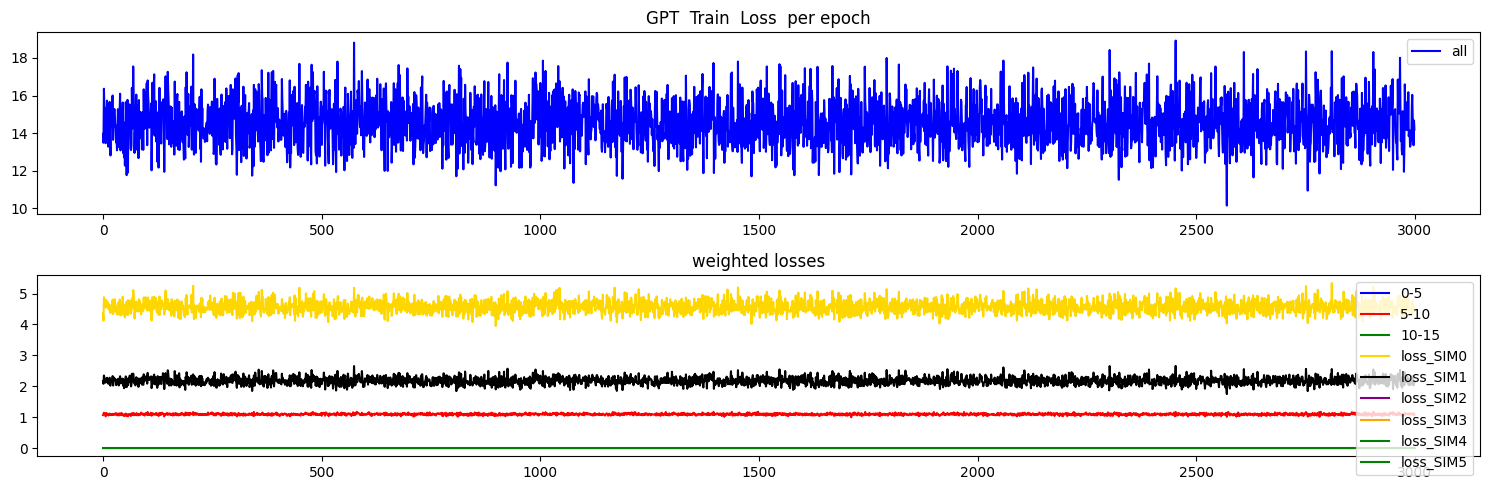

max tokens  29
torch.Size([1, 20, 35])
(49,)
(49,)
Test MSE Loss - SI only:  0.05117706209421158
Test MSE Loss - SI only 0-5:  0.055285025388002396
Test MSE Loss - SI only 5-10:  0.2437218725681305
Test MSE Loss - SI only 10-15:  0.12971900403499603
mae, mse, rmse, mape, mspe, rse, corr
(0.14573723, 0.05117706, 0.22622347, 2.215391, 16.299416, 1.6172827)
Testing R**2 - SI only:  -1.6156038088832485
Testing R**2 - SI only:  -1.6156038088832485
Testing R**2 - All features:  0.9759484886690218
Testing R**2 - (f2) - SI full:  -1.0601643424177238


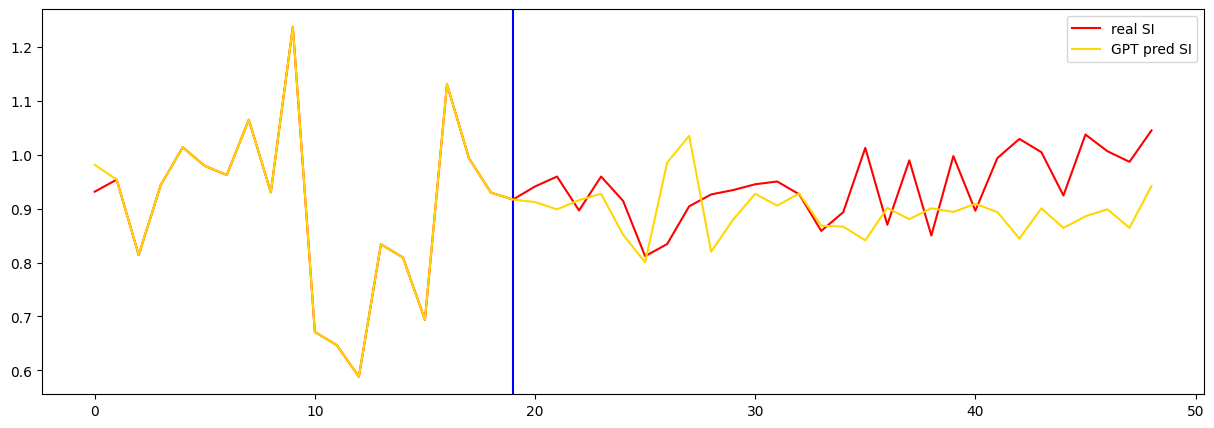

In [46]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


0 train loss =  17.069305419921875
seq length of pred =  30
[ 5.57790908  2.44219537 15.29981409 27.07201904  0.72889895  0.47776781]
[tensor(1.4578, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3599, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.959906578063965
seq length of pred =  30
[ 5.5115775   2.32192748 15.50665998 27.45598784  0.73273449  0.48384515]
[tensor(1.4655, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3183, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  15.59178638458252
seq length of pred =  30
[ 5.5001039   2.22972145 15.06479823 26.7706931   0.69189701  0.47247439]
[tensor(1.3838, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3165, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  15.555562973022461
seq length of pred =  30
[ 5.52512595  2.31421631 15.18982731 26.627584    0.70270802  0.47024673]
[tensor(1.4054, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3142, device='cud

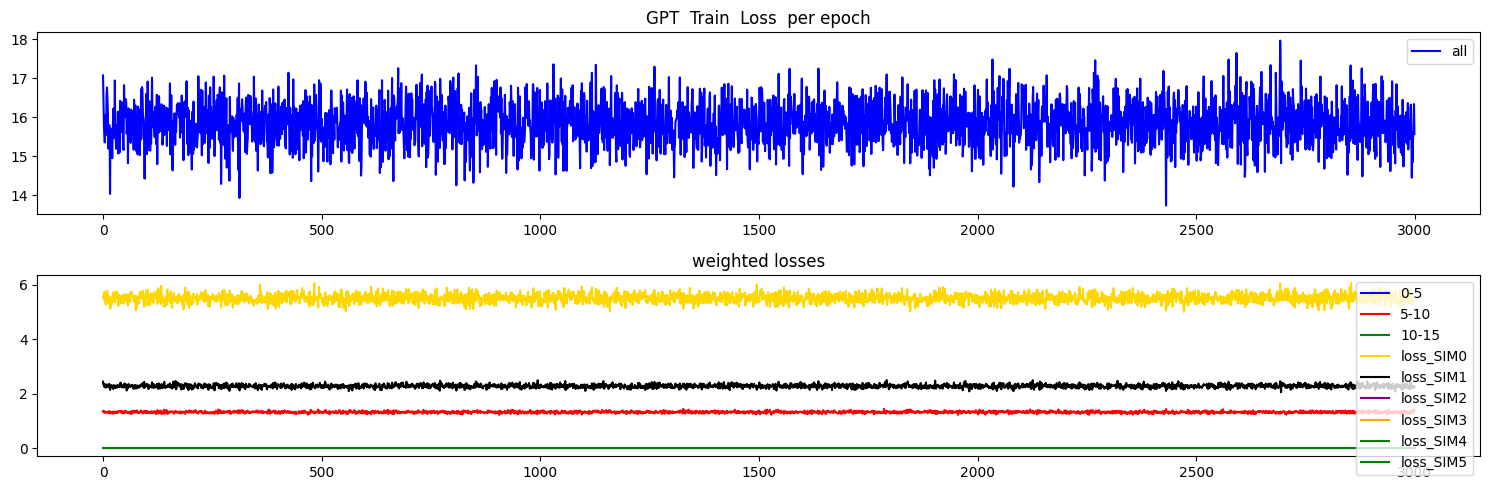

max tokens  29
torch.Size([1, 20, 35])
(49,)
(49,)
Test MSE Loss - SI only:  0.02994748018682003
Test MSE Loss - SI only 0-5:  0.04203158989548683
Test MSE Loss - SI only 5-10:  0.007109537720680237
Test MSE Loss - SI only 10-15:  0.030119439586997032
mae, mse, rmse, mape, mspe, rse, corr
(0.14163855, 0.02994748, 0.1730534, 1.6920652, 5.0176234, 1.2039567)
Testing R**2 - SI only:  -0.4495116887496762
Testing R**2 - SI only:  -0.4495116887496762
Testing R**2 - All features:  0.9926442206757139
Testing R**2 - (f2) - SI full:  -0.34381662068757346


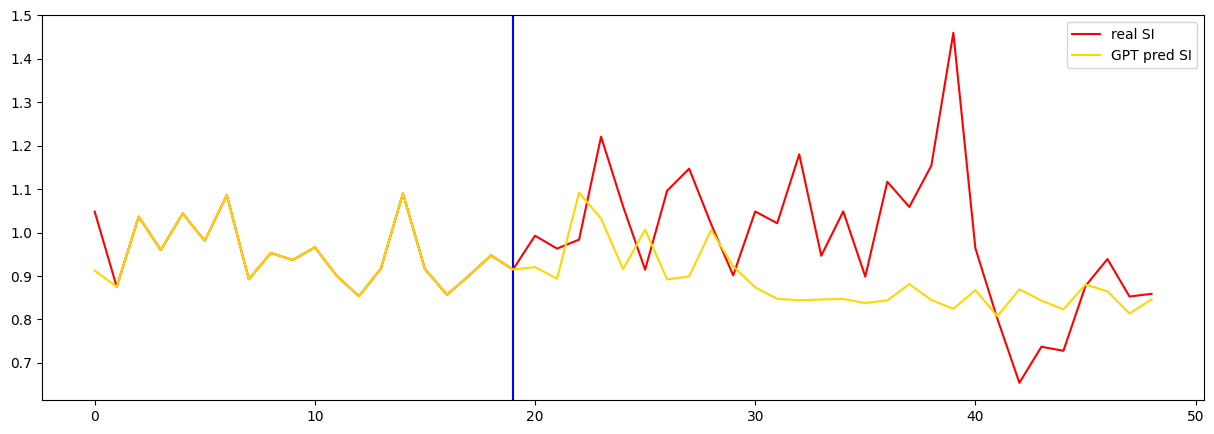

In [47]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


0 train loss =  17.27276039123535
seq length of pred =  30
[ 4.61170689  2.54935652 16.28393753 27.41451582  0.75768778  0.4807222 ]
[tensor(1.5154, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4408, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  16.814533233642578
seq length of pred =  30
[ 4.51259804  2.40979281 16.47888054 26.99974212  0.75057417  0.47730249]
[tensor(1.5011, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3906, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  18.51154327392578
seq length of pred =  30
[ 4.58315807  2.65771449 16.15316785 27.52318286  0.76552378  0.48553188]
[tensor(1.5310, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3923, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  18.207042694091797
seq length of pred =  30
[ 4.55708599  2.62792609 16.23793429 26.82340283  0.75305196  0.47390467]
[tensor(1.5061, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3842, device='cuda

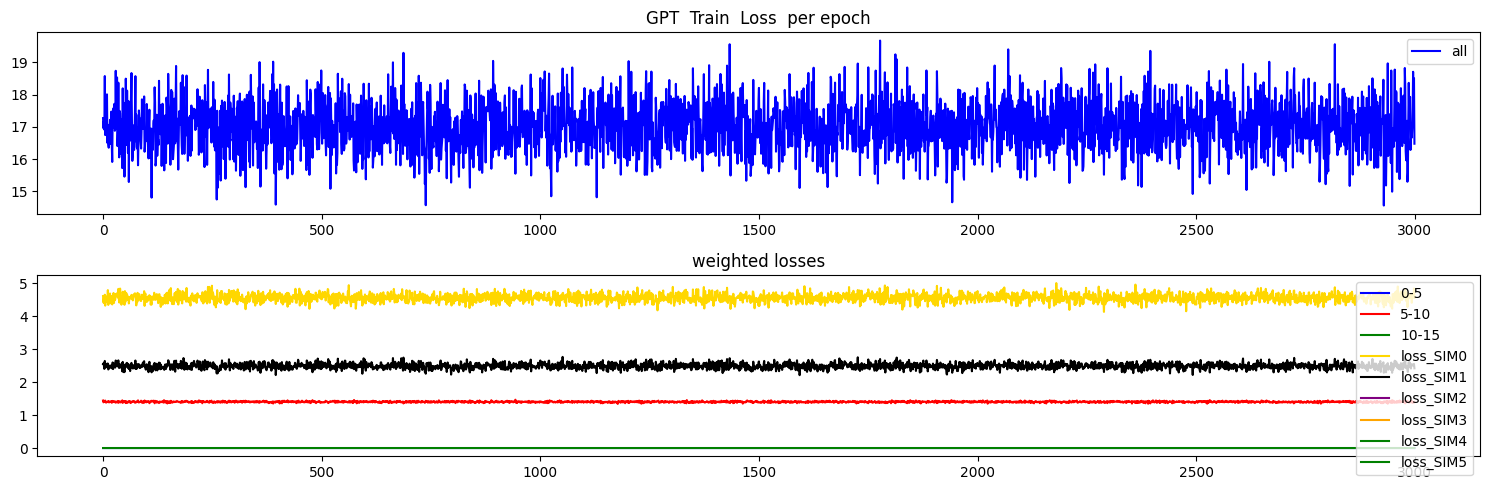

max tokens  29
torch.Size([1, 20, 35])
(49,)
(49,)
Test MSE Loss - SI only:  0.06661132723093033
Test MSE Loss - SI only 0-5:  0.07293026894330978
Test MSE Loss - SI only 5-10:  0.08114711195230484
Test MSE Loss - SI only 10-15:  0.056000374257564545
mae, mse, rmse, mape, mspe, rse, corr
(0.20339249, 0.06661133, 0.25809172, 9.929991, 2810.1543, 1.2871358)
Testing R**2 - SI only:  -0.6567186753006653
Testing R**2 - SI only:  -0.6567186753006653
Testing R**2 - All features:  0.9935183711089061
Testing R**2 - (f2) - SI full:  -1.7976711599797475


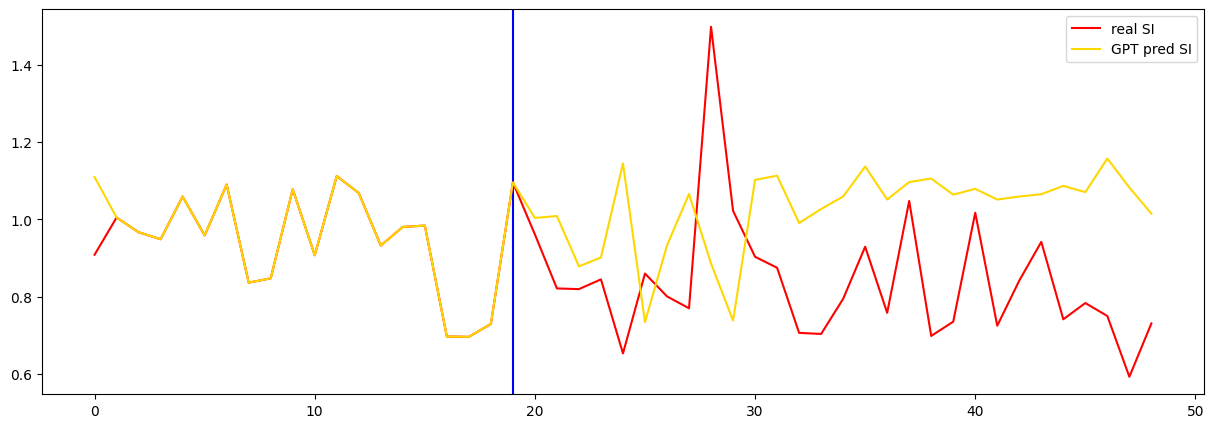

In [48]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


0 train loss =  19.367755889892578
seq length of pred =  30
[ 4.3485432   2.68390506 15.39143429 29.13742964  0.96785066  0.53530369]
[tensor(1.9357, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4557, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  19.628154754638672
seq length of pred =  30
[ 4.36888154  2.75080777 15.61003293 28.19603603  0.91741667  0.51571398]
[tensor(1.8348, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4032, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  19.545780181884766
seq length of pred =  30
[ 4.23506254  2.70120675 15.32412709 28.62984669  0.93065452  0.52128362]
[tensor(1.8613, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3993, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  20.052570343017578
seq length of pred =  30
[ 4.35202945  2.65629503 15.29450209 29.32385147  0.96153845  0.53802508]
[tensor(1.9231, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4741, device='cu

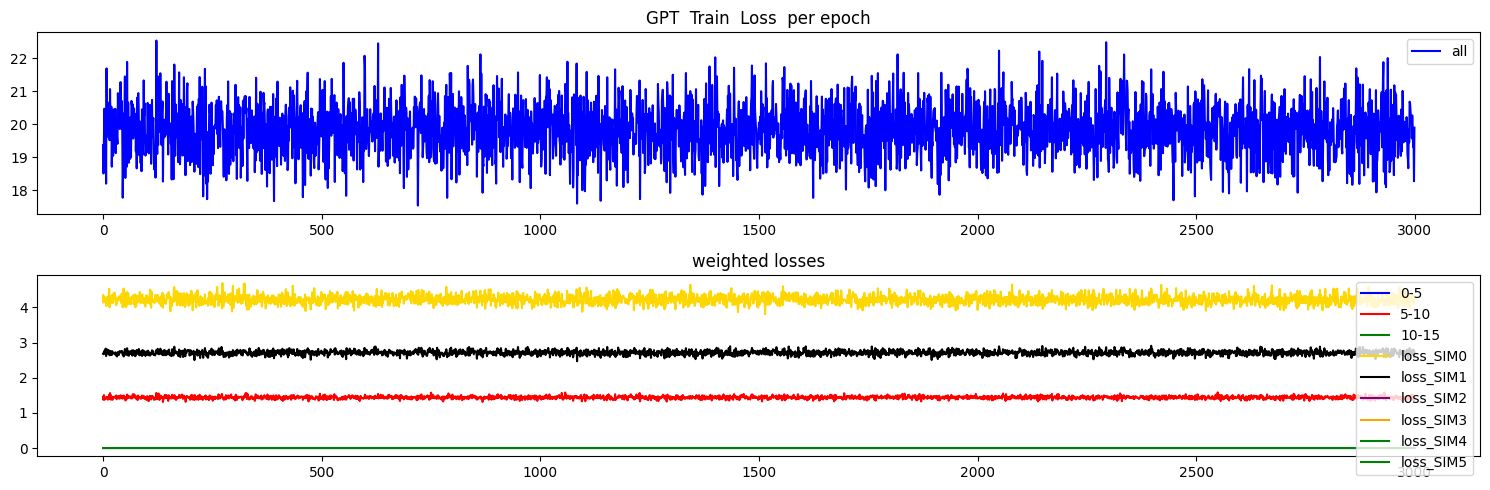

max tokens  29
torch.Size([1, 20, 35])
(49,)
(49,)
Test MSE Loss - SI only:  0.06859618425369263
Test MSE Loss - SI only 0-5:  0.0463593527674675
Test MSE Loss - SI only 5-10:  0.0720910057425499
Test MSE Loss - SI only 10-15:  0.09674187004566193
mae, mse, rmse, mape, mspe, rse, corr
(0.22221437, 0.06859618, 0.2619087, 5.3691087, 411.8471, 1.3085741)
Testing R**2 - SI only:  -0.7123665508617059
Testing R**2 - SI only:  -0.7123665508617059
Testing R**2 - All features:  0.986781580496033
Testing R**2 - (f2) - SI full:  -0.768706702191029


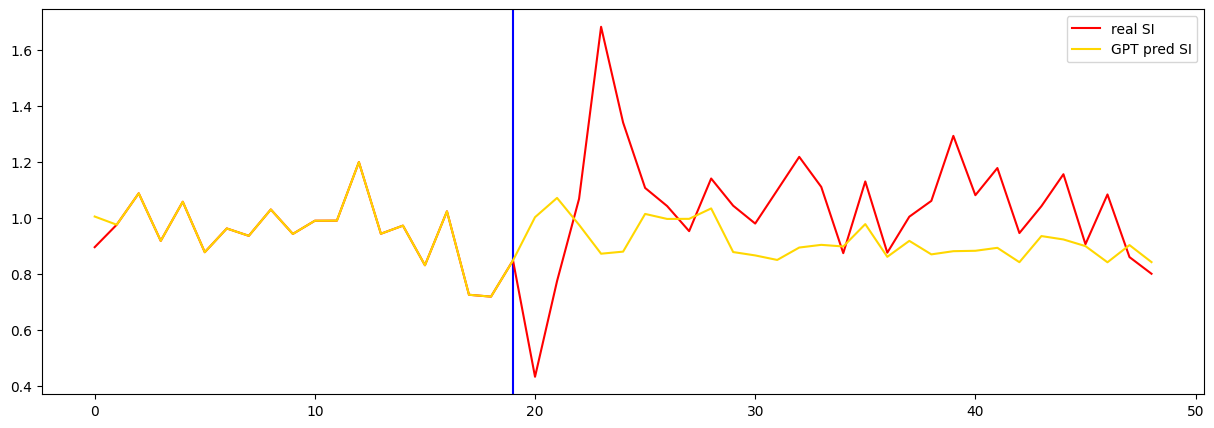

In [49]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [50]:
 
## inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [51]:

## tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
